<div align="center">
    <h1> <b>DEPARTAMENTO DE MARKETING</b></h1>
    <h1> <b>PROYECTO DE SEGMENTACIÓN DE CLIENTES BANCARIOS</b></h1><br>
</div>
<div>
    <h3> <b>Algoritmos: clustering con K-Means y Analisis de las Componentes Principales (PCA).</b></h3>
</div>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO.


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=1OjWCpwRHlCSNYaJoUUd2QGryT9CoQJ5e"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Segmentación de Clientes
  </td></tr>
</table>


## 1.1 Entendimiento del Negocio.

![alt text](https://drive.google.com/uc?id=1TlILFEVGZHessjmKkUMWL4NHlZ0DcHQb)

![alt text](https://drive.google.com/uc?id=1KaI1zjhARTFAs6X6VwqdsYZecd5EYDMw)

## 1.2 Objetivo del Estudio.

![alt text](https://drive.google.com/uc?id=1Q46sKROZf7jqKus0TfL7agQ5ZnzECiws)

## 1.3 Características del Cliente.

![alt text](https://drive.google.com/uc?id=1zJX7y-J2jhIL17Lh7OroOZvrlblI0u1s)

![alt text](https://drive.google.com/uc?id=1L03HfNPXpLdLlKHk_I6FIj_ahPCuPL0S)

![alt text](https://drive.google.com/uc?id=1i-OPyUph2PGuuZ5FtN0hGX3BkEXCAQNM)

Data Source: https://www.kaggle.com/arjunbhasin2013/ccdata

# TAREA #2: IMPORTAR LAS LIBRERÍAS. OBSERVACIONES PRINCIPALES DEL DATASET.

## 2.1 Importe de librerías.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize # para escalar los datos
from sklearn.cluster import KMeans # para realizar la reducción de dimension
from sklearn.decomposition import PCA # analisis de componmentes principales

## 2.2 Cargar y Leer el Dataset. Configuración de la vista.

In [2]:
# Leer el dataset
df = pd.read_csv("marketing_data.csv")
# A mi me gusta ver todas las columnas, así que realizaré una modificación en la configuración de pandas.
# Esta función recibe dos argumentos: el nombre de la opción y la cantidad de columnas que queremos visualizar. 
pd.set_option('display.max_columns',100) # lo mismo para las filas con max_rows
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2.3 Leyenda en español de las Columnas.

##### CUSTID: Identificación del titular de la tarjeta de crédito
##### BALANCE: Cantidad de saldo que queda en la cuenta del cliente para hacer compras
##### BALANCE_FREQUENCY: Frecuencia de la actualización del saldo, puntuación entre 0 y 1 (1 = actualizado con frecuencia, 0 = no actualizado con frecuencia)
##### PURCHASES: Cantidad de compras realizadas desde la cuenta
##### ONEOFFPURCHASES: Importe máximo de compra realizado en una sola vez
##### INSTALLMENTS_PURCHASES: Importe de la compra realizada en cuotas
##### CASH_ADVANCE: Anticipo otorgado al usuario
##### PURCHASES_FREQUENCY: frecuencia con la que se realizan las compras, puntuación entre 0 y 1 (1 = compras frecuentes, 0 = compras no frecuentes)
##### PURCHASES_FREQUENCY: Frecuencia de las Compras se están realizando, puntuación entre 0 y 1 (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### ONEOFF_PURCHASES_FREQUENCY: Con qué frecuencia las compras se realizan de una sola vez (1 = compra con frecuencia, 0 = no compra con frecuencia)
##### PURCHASES_INSTALLMENTS_FREQUENCY: Con qué frecuencia se realizan las compras a plazos (1 = se realizan con frecuencia, 0 = no se realizan con frecuencia)
##### CASH_ADVANCE_FREQUENCY: con qué frecuencia el gasto se paga por adelantado
##### CASH_ADVANCE_TRX: número de transacciones realizadas con "Efectivo por adelantado"
##### PURCHASES_TRX: número de transacciones de compras realizadas
##### CREDIT_LIMIT: límite de tarjeta de crédito para el usuario
##### PAYMENTS: Número de pagos realizados por el usuario
##### MINIMUM_PAYMENTS: cantidad mínima de pagos realizados por el usuario
##### PRC_FULL_PAYMENT: porcentaje del pago total pagado por el usuario
##### TENURE: Años que el usuario lleva usando el servicio de tarjeta de crédito

## 2.4 Primeras descripciones y conclusiones.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
# La compra más alta efectuada de una sola vez es de 40761 dólares. ¿Quién hizo esta compra?
df[df['ONEOFF_PURCHASES'] == 40761.25]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [6]:
# El avance en efectovo más alto es de 47133 dólares. ¡Vamos a investigar quien ha hecho este avance!
df[df['CASH_ADVANCE'] == 47137.21176]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


#### Al ejecutar el último código podemos observar:
#####
##### 1.- El cliente que hizo el avance más alto de todos.
##### 2.- Realizó un total de 123 transacciones por adelantado.
##### 3.- Tiene un saldo cómodo.
##### 4.- Siempre mantiene un saldo actualizado.
##### 5.- Ha realizado solo 432 vs las 49039 compras que realizó el cliente que más ha pagado por una sola compra.
##### 6.- Pidió mucho dinero, si hablamos de 47137 dólares (aprox 41,6M de pesos).
##### 7.- Reaiza compras con una frecuencia del 58%.
##### 8.- La mitad del tiempo hace uso de sus tarjetas en compras vs el cliente anterior, que usa crédito para comprar el 92% de las veces.
##### 9.- Paga siempre por adelantado vs el otro cliente que ha pagado por adelantado el 8% de las veces.
#####
##### Conclusión: podemos definir qué tipo de cliente es una persona al analizar sus datos. Por ejemplo, en este caso tenemos un cliente que siempre mantiene actualizada su tarjeta de crédito con bastante dinero. No es un cliente frecuente, pero si compra bastante, aunque solo la mitad de sus compras son realizadas con su tarjeta de crédito. Finalmente, realizó el avance más alto entre los 8950 clientes del dataset, pero se sabe que este cliente siempre paga por adelantado. ¿Qué tal? ¿Sabemos suficiente sobre este cliente?

# TAREA #3: VISUALIZACIÓN DEL DATASET

## 3.1 Transformar entradas de texto en entradas numéricas.

In [7]:
# En este data set no hay datos de tipo texto, sin contar a CUST_ID que será eliminado. 

# Si hubiera:
# Ya que a veces algunas columnas son objetos, debemos cambiarlas a entero para poder visualizar.
# Ejemplo: el data set "jugadores"
# tiene una columna llamada "seleccionado" y las respuestas son YES and NO, entonces:
# Primero revisamos cuántas respuestas del tipo texto hay en cada columna con el código:
# jugadores['seleccionado'].value_counts()
# Luego reemplazamos la columna en cuestión por enteros usando la función lambda.
# jugadores['seleccionado'] = jugadores['seleccionado'].apply(lambda x: 1 if x == 'Yes' else 0)

## 3.2 Revisión e imputación de nulos.

### 3.2.1 Hallar nulos.

In [8]:
df.isna().sum().sort_values(ascending = False) # se buscan, se suman y se ordenan

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
CUST_ID                               0
BALANCE                               0
PRC_FULL_PAYMENT                      0
PAYMENTS                              0
PURCHASES_TRX                         0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_FREQUENCY                   0
CASH_ADVANCE                          0
INSTALLMENTS_PURCHASES                0
ONEOFF_PURCHASES                      0
PURCHASES                             0
BALANCE_FREQUENCY                     0
TENURE                                0
dtype: int64

### 3.2.2 Mapa de calor de nulos.

<AxesSubplot: >

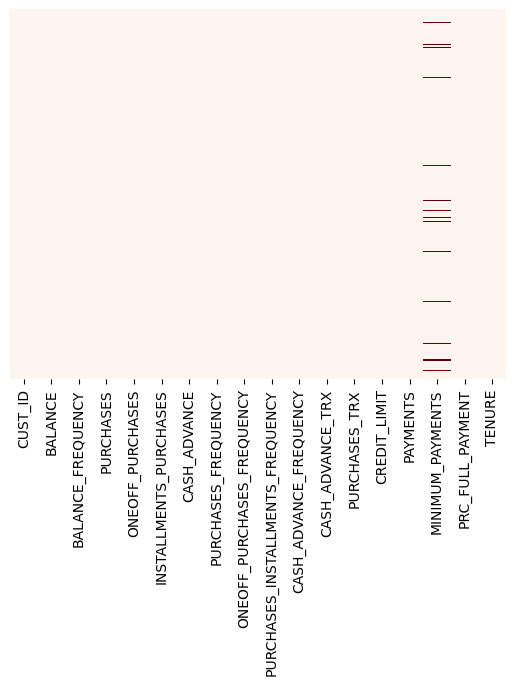

In [9]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='Reds') # no es muy útil a mi parecer

### 3.2.3 Imputación de nulos.

##### 1.- Solo para datos numéricos se reemplazan los datos nulos directamente por la media o la media armónica según sea el caso.
##### 2.- Para datos categóricos es conveniente reemplazar por la moda si es categórico nominal u ordinal, aunque también se podría reemplazar por la media, si fueran datos categóricos ordinales. Esto se debe decidir con cuidado para no alterar demasiado los resultados.
##### 3.- También se puede eliminar la columna pero, generalmente, se perderían muchos datos importantes para el estudio.

##### Existen dos formas de hacerlo:

In [10]:
# Forma 1: automática
df.loc[(df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].mean()
df.loc[(df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = df['CREDIT_LIMIT'].mean()

In [11]:
# Forma 2: manual
# df['MINIMUM_PAYMENTS'].mean()
# df['CREDIT_LIMIT'].mean()
# Reemplazo en datos nulos de MINIMUM_PAYMENTS y CREDIT_LIMIT
#data['MINIMUM_PAYMENTS'] = data['MINIMUM_PAYMENTS'].replace(np.nan,864.2065422944161)
#data['CREDIT_LIMIT'] = data['CREDIT_LIMIT'].replace(np.nan,4494.449450364581)
# Esto no es automático

In [12]:
# comprobar:
df.isna().sum().sort_values(ascending = False)

CUST_ID                             0
BALANCE                             0
PRC_FULL_PAYMENT                    0
MINIMUM_PAYMENTS                    0
PAYMENTS                            0
CREDIT_LIMIT                        0
PURCHASES_TRX                       0
CASH_ADVANCE_TRX                    0
CASH_ADVANCE_FREQUENCY              0
PURCHASES_INSTALLMENTS_FREQUENCY    0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_FREQUENCY                 0
CASH_ADVANCE                        0
INSTALLMENTS_PURCHASES              0
ONEOFF_PURCHASES                    0
PURCHASES                           0
BALANCE_FREQUENCY                   0
TENURE                              0
dtype: int64

## 3.3 Datos duplicados.

In [13]:
df.duplicated().sum()

0

## 3.4 Eliminar datos inservibles.

In [14]:
# Podemos deshacernos del campo Customer ID porque no posee valor estadístico
df.drop(['CUST_ID'], axis=1, inplace = True)

In [15]:
# Revisar
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 3.5 Observación de las columnas (variables, atributos, etc).

In [16]:
# Cantidad de columnas
cantidad_columnas = len(df.columns)
cantidad_columnas

17

In [17]:
# Nombre de cada columna
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

## 3.6 Graficos.

### 3.6.1 Gráfico KERNEL DENSITY ESTIMATE o gráfico de densidad de probabilidad de variable continua.

C:\Users\Danko\AppData\Local\Temp\ipykernel_12792\2215468620.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
C:\Users\Danko\AppData\Local\Temp\ipykernel_12792\2215468620.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750

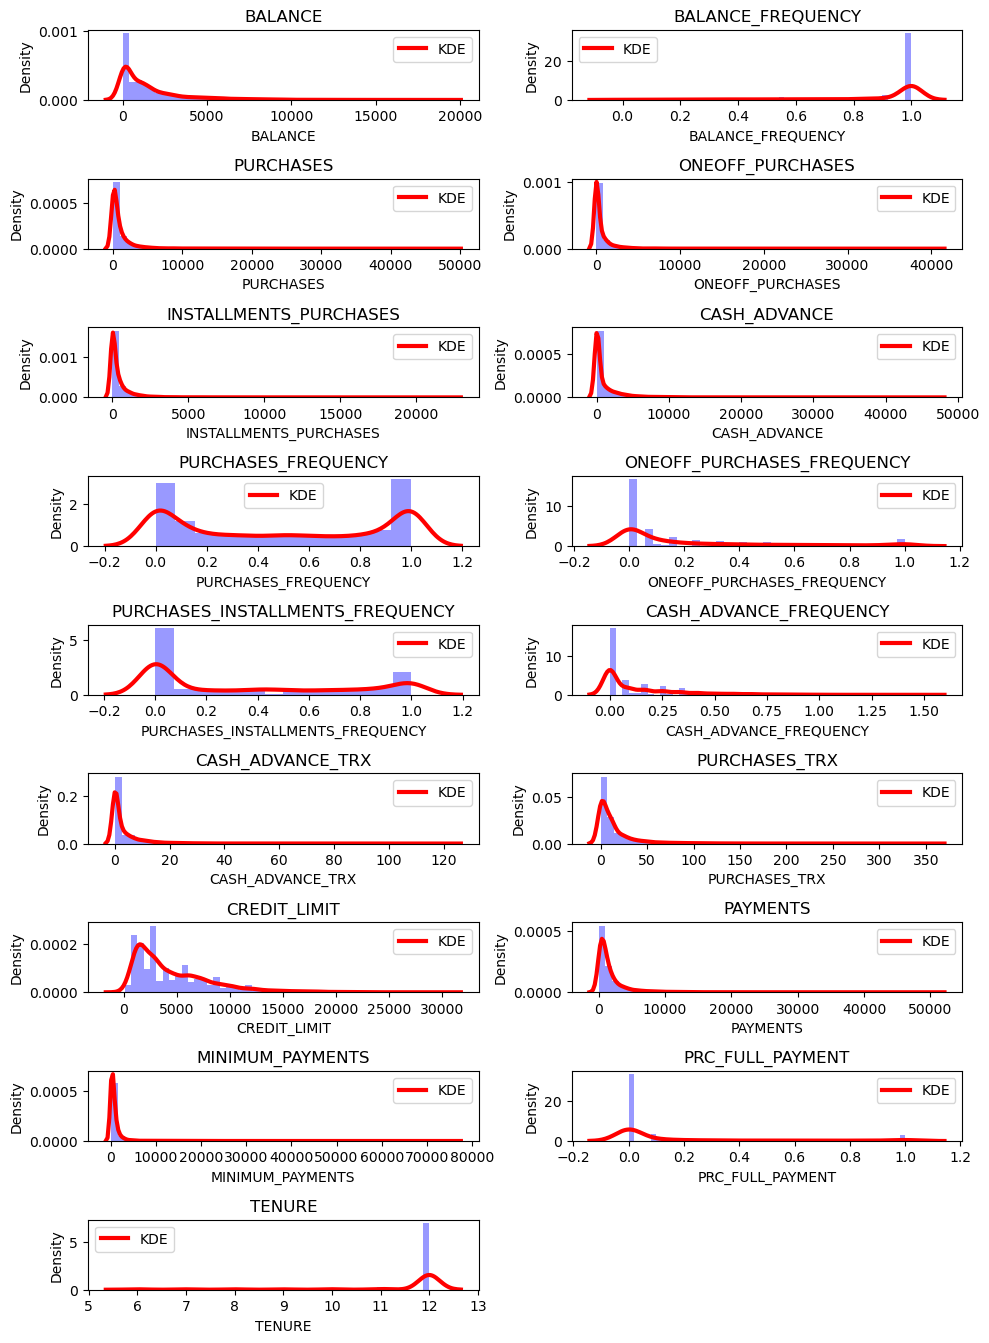

In [18]:
# distplot combina la función matplotlib.hist con la de seaborn kdeplot()
# KDE Plot representa la Kernel Density Estimate
# KDE se utiliza para visualizar la densidad de una probabilidad de una variable continua. 
# KDE nos muestra la densidad de una probabilidad para diferentes valores de una variable continua. 

plt.figure(figsize=(10,25))
for i in range(cantidad_columnas):
    plt.subplot(cantidad_columnas,2,i+1) # filas, columnas, actual
    sns.distplot(df[df.columns[i]], kde_kws = {'color':'r', 'lw':3, 'label': 'KDE'}, hist_kws = {'color':'b'})
    plt.title(df.columns[i])

    plt.tight_layout()
    plt.legend()

### 3.7.2 Histogramas.

array([[<AxesSubplot: title={'center': 'BALANCE'}>,
        <AxesSubplot: title={'center': 'BALANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'PURCHASES'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES'}>],
       [<AxesSubplot: title={'center': 'INSTALLMENTS_PURCHASES'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE'}>,
        <AxesSubplot: title={'center': 'PURCHASES_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'ONEOFF_PURCHASES_FREQUENCY'}>],
       [<AxesSubplot: title={'center': 'PURCHASES_INSTALLMENTS_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_FREQUENCY'}>,
        <AxesSubplot: title={'center': 'CASH_ADVANCE_TRX'}>,
        <AxesSubplot: title={'center': 'PURCHASES_TRX'}>],
       [<AxesSubplot: title={'center': 'CREDIT_LIMIT'}>,
        <AxesSubplot: title={'center': 'PAYMENTS'}>,
        <AxesSubplot: title={'center': 'MINIMUM_PAYMENTS'}>,
        <AxesSubplot: title={'center': 'PRC_FULL_PAYMENT'}>],
       [<Axes

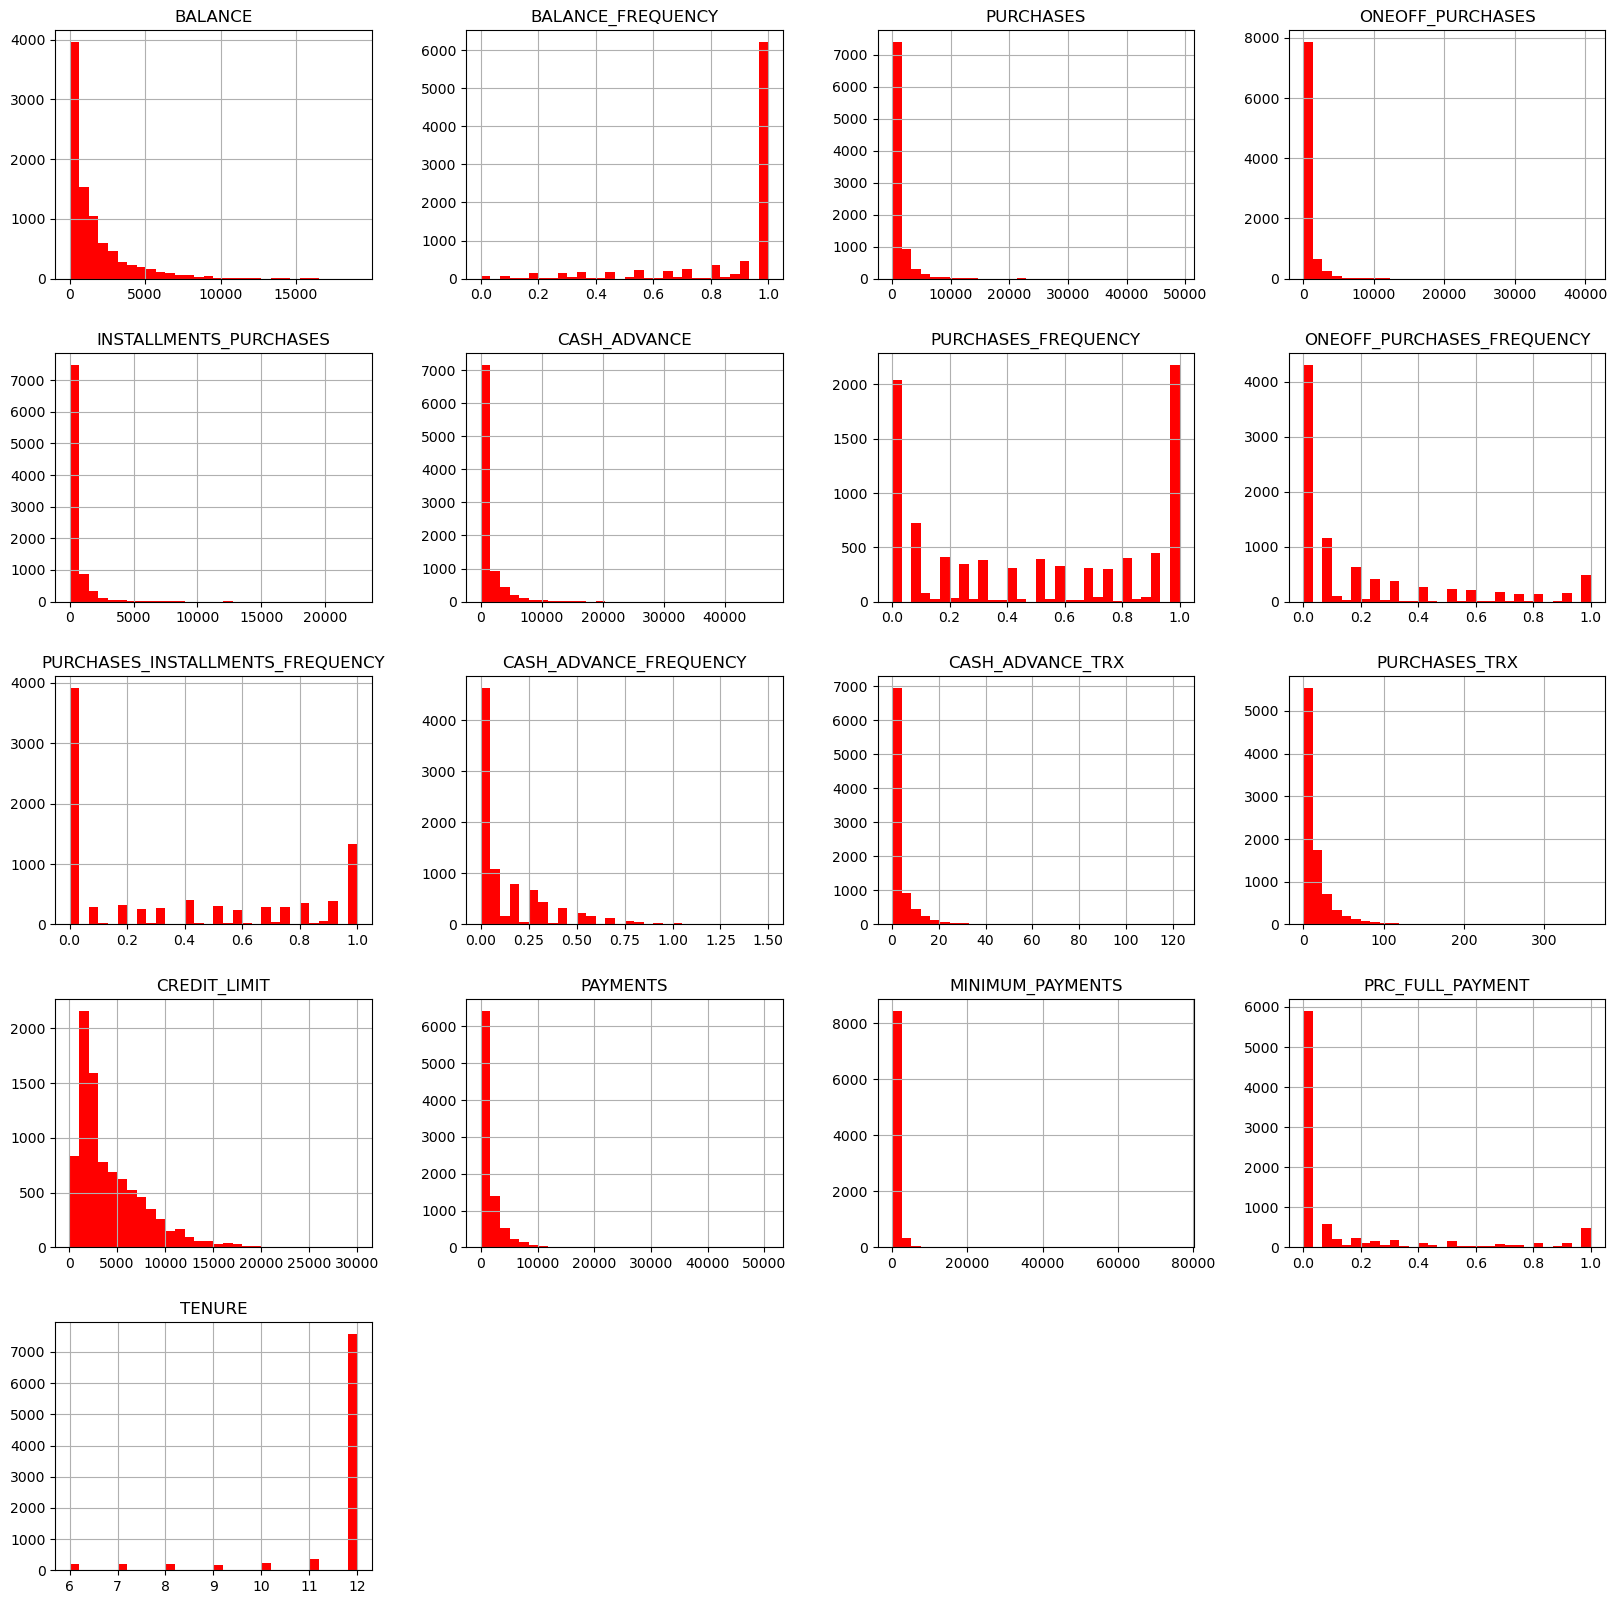

In [19]:
# Ahora que tenemos la seguridad de que no hay datos nulos, realizaremos un mapa global de nuestros datos.
df.hist(bins = 30, figsize = (20, 20), color ='r')

### 3.6.3 Conclusiones.

##### 1.- La mayoría  de los clientes tiene un saldo de 1000 dólares. Este saldo se distribuye de 0 a 5000 dólares entre todos los clientes y la mayoría de ellos, lo mantienen siempre actualizado.
##### 2.- Los clientes realizan entre 0 y 3500 compras en este rango de tiempo, pero la mayoría de ellos no supera las 1000 compras. El importe máximo en una sola venta está entre 0 y 3000 dólares, pero nuevamente, la mayoría no supera los 1000 dólares.
##### 4.- Las ventas que se producen usando la tarjeta de crédito rondan entre las 0 y 1500, estando la mayoría por debajo de las 500 ventas.
##### 5.- Los avances en efectivos rondan entre 0 y 3000 dólares, estando la mayoría en torno a los 1500 dólares.
##### 6.- La frecuencia de compras y la frecuencia de compras por adelantado son bimodales, dónde la gran mayoría de usuarios no compran o compran siempre
##### 7.- Los clientes no hacen compras de grandes sumas de valor, la mayoría está entre 0 y 2%.
##### 8.- Los clientes no piden avances en efectivo, encontrándose la mayoría entre 0 y 2%.
##### 9.- La cantidad de transacciones realizadas es de 0 a 50 y las transacciones con dinero en efectivo por adelantado, entre 0 y 16.
##### 10.- El límite de las tarjetas de crédito de los clientes en su mayoría es de 1500 dólares, pero se distribuyen entre los 1000 y los 10K dólares.
##### 11.- Los pagos se distribuyen entre los 0 y los 5000 pagos aproximadamente y los pagos minimos entre 0 y 3000. Por otra parte, muy pocos clientes pagan su deuda por completo.
##### 12.- La mayoría de clientes llevan 12 años usando el servicio.

## 3.8 Correlaciones.

### 3.8.1 Matriz de Correlación.

<AxesSubplot: >

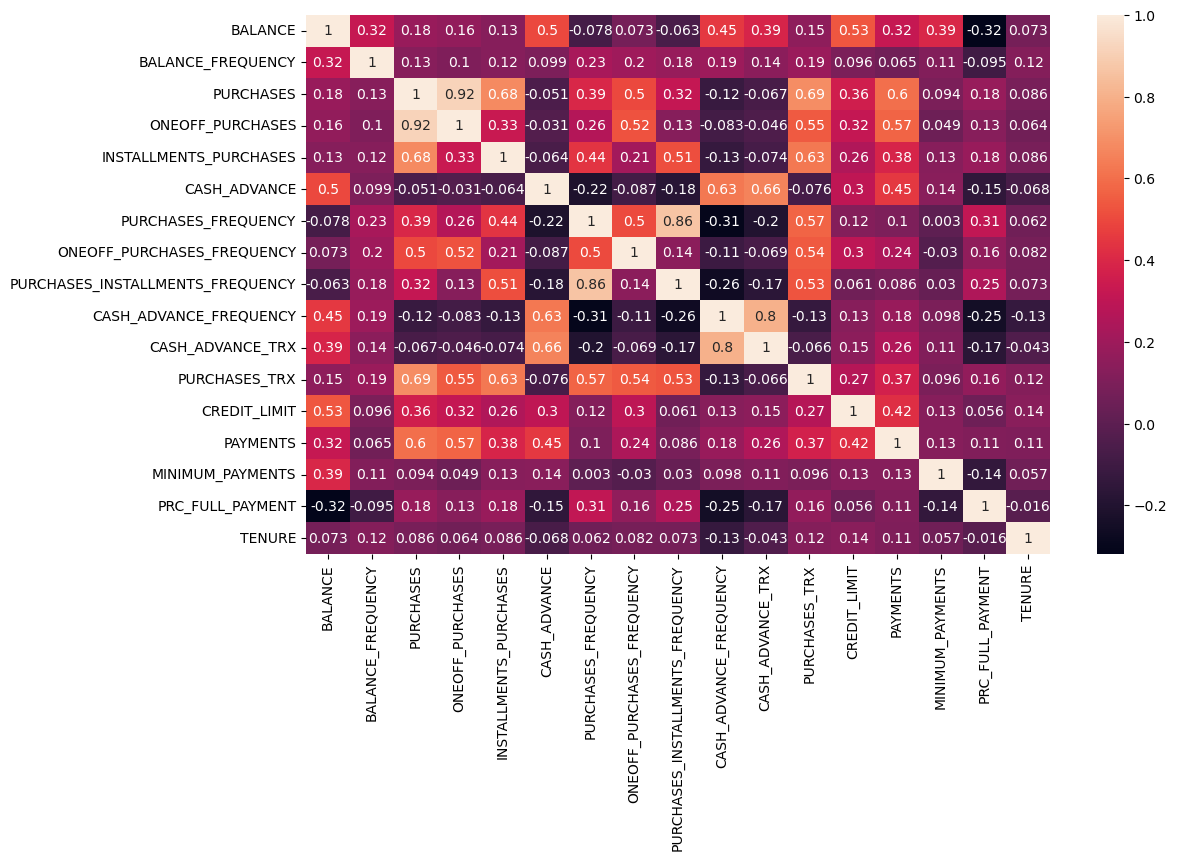

In [20]:
correlations = df.corr()
f, ax = plt.subplots(figsize = (12,7)) # grafico en forma de mapa de calor
sns.heatmap(correlations, annot = True) # Pintar las correlations

### 3.8.2 Observaciones en la Matriz.

##### 1.- ONEOFF_PURCHASES está altamente correlacionado PURCHASES
##### 2.- PURCHASES_INSTALLMENTS_FREQUENCY está altamente correlacionado con PURCHASES_FREQUENCY
##### 3.- CASH_ADVANCE_TRX está altamente correlacionado con CASH_ADVANCE_FREQUENCY

### 3.8.3 Correlaciones graficadas.

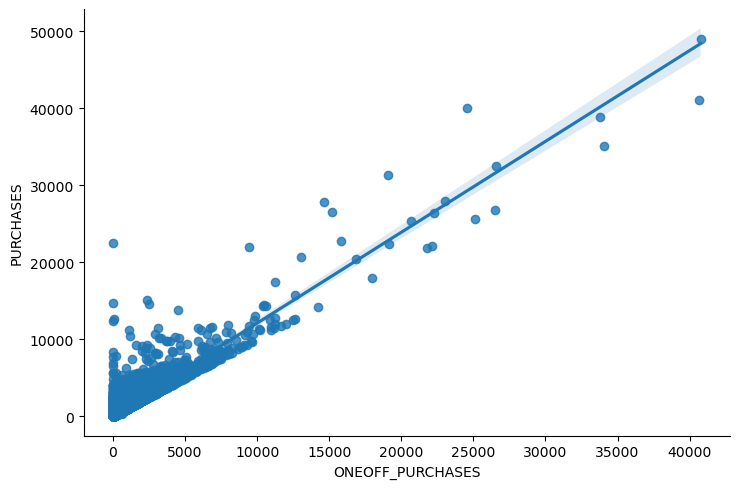

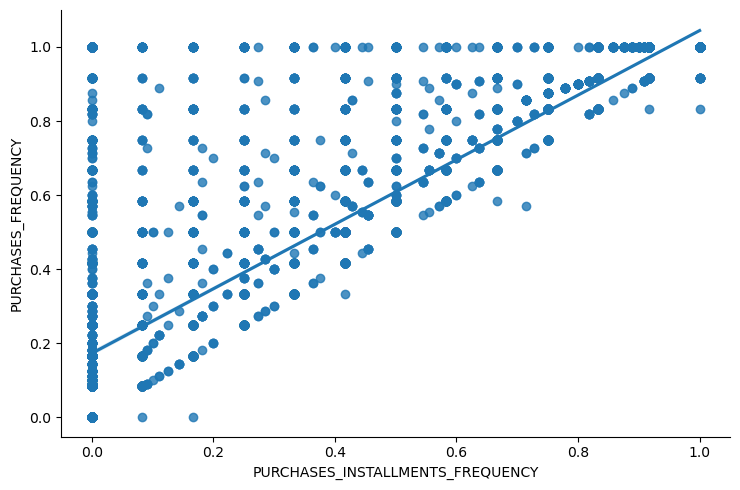

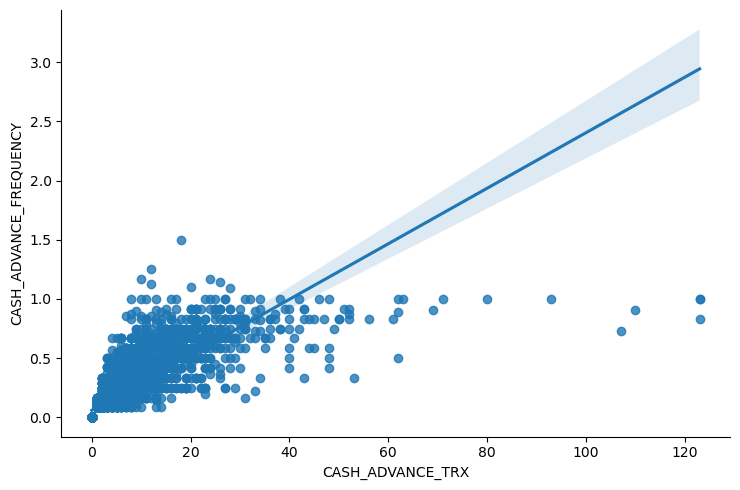

In [21]:
sns.lmplot(x ='ONEOFF_PURCHASES', y ='PURCHASES', data = df, aspect = 1.5)
sns.lmplot(x='PURCHASES_INSTALLMENTS_FREQUENCY', y='PURCHASES_FREQUENCY', data = df, aspect = 1.5)
sns.lmplot(x='CASH_ADVANCE_TRX', y='CASH_ADVANCE_FREQUENCY', data = df, aspect = 1.5)

# TAREA #4: ENTENDER LA TEORÍA DETRÁS DE K-MEANS

![alt text](https://drive.google.com/uc?id=1T2vAOTCInx9l2S9b9H5xm-__h-RLRY5s)

![alt text](https://drive.google.com/uc?id=1eXSerp2FQpxhAa355hKeVT0-tY94ixsw)

![alt text](https://drive.google.com/uc?id=1D12cmll79HCx_Xbt3PSq51PnytJ7DhSr)

![alt text](https://drive.google.com/uc?id=1Syuco6pZ410oP6KbfgCH18s09eB4Hd2H)

![alt text](https://drive.google.com/uc?id=1DQ4KUV66YG-xnZ4xorQFgtkx5EbE2GLI)

![alt text](https://drive.google.com/uc?id=1LzWnRt2w1bLUBGJ7tRK-b4Xudbx54H3D)

![alt text](https://drive.google.com/uc?id=1orzdGxbZPiWlLZcI7EKHAmhnz7T41cV_)

![alt text](https://drive.google.com/uc?id=1ITLmp2XTCUFIM-BPpDWOYmfjxENxywer)

# TAREA #5: ENCONTRAR EL NÚMERO ÓPTIMO DE CLUSTERS UTILIZANDO EL MÉTODO DEL CODO DE JAMBU

## 5.1 Escalar el dataset.

In [22]:
# Los números de cada variable son muy distintos entre si, por lo tanto:
scaler = StandardScaler() # escalar variables
df_scaled = scaler.fit_transform(df)

In [23]:
df_scaled.shape

(8950, 17)

In [24]:
df_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

## 5.2 Graficar el codo de jambú.

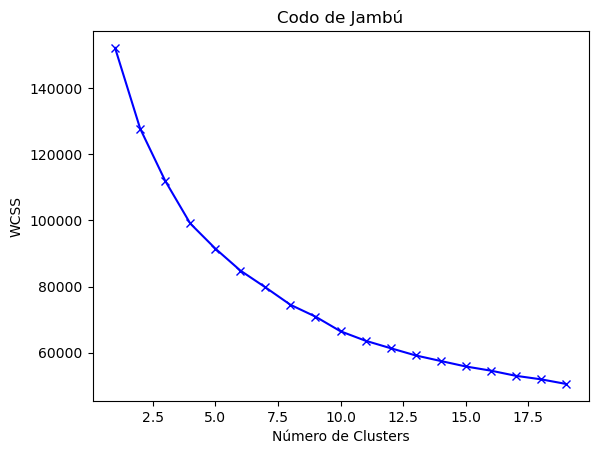

In [25]:
wcss1 = []

for i in range(1,20):
    kmeans = KMeans(n_clusters = i, max_iter = 300)
    kmeans.fit(df_scaled) # Aquí anota que aplica K-means a la base de datos
    wcss1.append(kmeans.inertia_)

plt.plot(range(1,20),wcss1, 'bx-')
plt.title('Codo de Jambú')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS') # Es un indicador de qué tan similares son los individuos dentro de los clusters
plt.show()

### 5.3 Observaciones y Conclusión.

##### Con el gráfico podemos ver que en x = 4 es donde se forma el codo de la curva.
##### Sin embargo, según el profesor del curso, los valores no se reducen a una forma lineal hasta x = 8, por lo que él decide usar 8 clusteres.
##### Yo usaré 4.

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

## 6.1 Crear el modelo de entrenamiento.

In [26]:
kmeans = KMeans(4) # creación modelo
kmeans.fit(df_scaled) # entrenamiento del modelo
labels = kmeans.labels_ # guardamos las etiquetas que creó el modelo en labels

## 6.2 Ver los Clusters.

In [27]:
# Ver los labels
labels

array([2, 0, 1, ..., 1, 2, 2])

In [28]:
# Ver cantidad de etiquetas creadas
labels.shape

(8950,)

In [29]:
# Etiqueta menor
labels.min()

0

In [30]:
# Etiqueta mayor
labels.max()

3

In [31]:
# Ver los 8 baricentros de cada cluster
kmeans.cluster_centers_.shape # muestra en este caso las 8 observaciones x 17 valores

(4, 17)

In [32]:
# Ver los centros de cada cluster
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])      
cluster_centers # cada fila del siguiente set sería un centroide del clustering

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1.449293,0.385485,-0.240061,-0.169240,-0.256784,1.671097,-0.514944,-0.220476,-0.457983,1.737665,1.606652,-0.289480,0.826278,0.593490,0.485866,-0.406492,-0.098402
1,-0.316260,0.253284,0.117080,0.006257,0.265106,-0.365173,0.989481,0.327251,0.879153,-0.461165,-0.359505,0.307291,-0.069061,-0.132286,-0.089057,0.398033,0.060357
2,-0.270905,-0.376322,-0.342100,-0.230243,-0.385695,-0.186886,-0.788375,-0.388132,-0.705874,-0.108946,-0.170141,-0.472796,-0.336106,-0.263729,-0.120665,-0.256862,-0.052935
3,0.975456,0.466690,3.188550,2.783848,2.425095,-0.134901,1.135625,1.812260,1.064826,-0.310555,-0.154505,3.045176,1.443770,1.962088,0.483956,0.459303,0.322940


### Observación: No es fácil entender estos valores (YA QUE SON VALORES ESCALADOS), por lo que conviene realizar la transformación inversa. ES DECIR, transformarlos nuevamente a su formato original.

## 6.3 Transformación Escalar Inverso.

In [33]:
cluster_centers =scaler.inverse_transform(cluster_centers) # transformación escalar inversa
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns]) #transformar a dataframe 
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4581.056816,0.968588,490.310239,311.533526,178.860669,4483.238948,0.283679,0.136685,0.182423,0.482869,14.213047,7.514451,7500.788229,3451.238065,1996.497757,0.034823,11.385632
1,906.206541,0.937271,1253.347114,602.822370,650.800021,213.086711,0.887477,0.300083,0.713835,0.042860,0.795468,22.347943,4243.178370,1350.187657,656.663216,0.270132,11.598092
2,1000.609310,0.788124,272.303099,210.281073,62.288177,586.962611,0.173937,0.086670,0.083905,0.113343,2.087741,2.957884,3271.558732,969.674900,583.001182,0.078587,11.446478
3,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,2.194444,90.401515,9747.474747,7413.195964,1992.044515,0.288053,11.949495


## 6.4 Predicción o Segmentación de un cliente recién llegado.

##### 1.- Ahora podemos otorgar un cluster, no solo a las 8950 personas del dataframe, si no a cualquier otro cliente que se agregue a la empresa, es decir, a otro otro dataset con nuevas observaciones. Las escalamos usando el mismo scaler y así nos podemos quedar con la nueva etiqueta que le asiganríamos a esos nuevos clientes. Esto es verdaderamente muy sencillo, porque gracias al trabajo realizado, ahora somos capaces de llevar a cabo la transformación.
##### 2.- En particular, como nuestros clientes ya los tenemos en el dataframe original, este es el momento perfecto para combinarlo todo y añadir la columna cluster al dataset, usando las labels que devuelve el algoritmo originalmente o usando el y_kmeans si queremos hacer una preddiccion final.
##### En conclusión, las labels son las mismas etiquetas que se han ido asignando a cada una de las observaciones del dataframe como parte del proceso iterativo de kmeans y las y_kmeans es lo contrario, es decir, una vez que ya tenemos el cluster definido, si yo pusiera la observacion en ese espacio de 17 dimensiones, obtendríamos cual de los 4 centros le quedaría mas cerca a ese cliente.

In [34]:
y_kmeans = kmeans.fit_predict(df_scaled)
y_kmeans

array([3, 0, 1, ..., 1, 3, 3])

## 6.5 Concatenar las etiquetas de clusters a la tabla original.

In [35]:
# Concatenamos las etiquetas (labels) de los clusters con el dataset original (df)
df_cluster = pd.concat([df, pd.DataFrame({'CLUSTER':labels})], axis = 1)
df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


## 6.6 Definición de los grupos de clientes.

### 6.6.1 Visualización de los centroides.

In [36]:
cluster_centers 

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,4581.056816,0.968588,490.310239,311.533526,178.860669,4483.238948,0.283679,0.136685,0.182423,0.482869,14.213047,7.514451,7500.788229,3451.238065,1996.497757,0.034823,11.385632
1,906.206541,0.937271,1253.347114,602.822370,650.800021,213.086711,0.887477,0.300083,0.713835,0.042860,0.795468,22.347943,4243.178370,1350.187657,656.663216,0.270132,11.598092
2,1000.609310,0.788124,272.303099,210.281073,62.288177,586.962611,0.173937,0.086670,0.083905,0.113343,2.087741,2.957884,3271.558732,969.674900,583.001182,0.078587,11.446478
3,3594.804621,0.987825,7815.591616,5213.055404,2604.051364,695.978299,0.946132,0.743090,0.787626,0.072999,2.194444,90.401515,9747.474747,7413.195964,1992.044515,0.288053,11.949495


### 6.6.2 Frecuencia de cada Cluster.

In [37]:
cantidad_clientes_0 = 0
cantidad_clientes_1 = 0
cantidad_clientes_2 = 0
cantidad_clientes_3 = 0
for i in df_cluster['CLUSTER']:
    if i == 0:
        cantidad_clientes_0 += 1
    elif i == 1:
        cantidad_clientes_1 += 1
    elif i == 2:
        cantidad_clientes_2 += 1
    else:
        cantidad_clientes_3 += 1    
print('Cluster 0: {} clientes. \nCluster 1: {} clientes. \nCluster 2: {} clientes. \nCluster 3: {} clientes.'.format(cantidad_clientes_0,cantidad_clientes_1,cantidad_clientes_2,cantidad_clientes_3))

Cluster 0: 1211 clientes. 
Cluster 1: 3356 clientes. 
Cluster 2: 3987 clientes. 
Cluster 3: 396 clientes.


### 6.6.3 Visualización de histogramas para cada cluster.

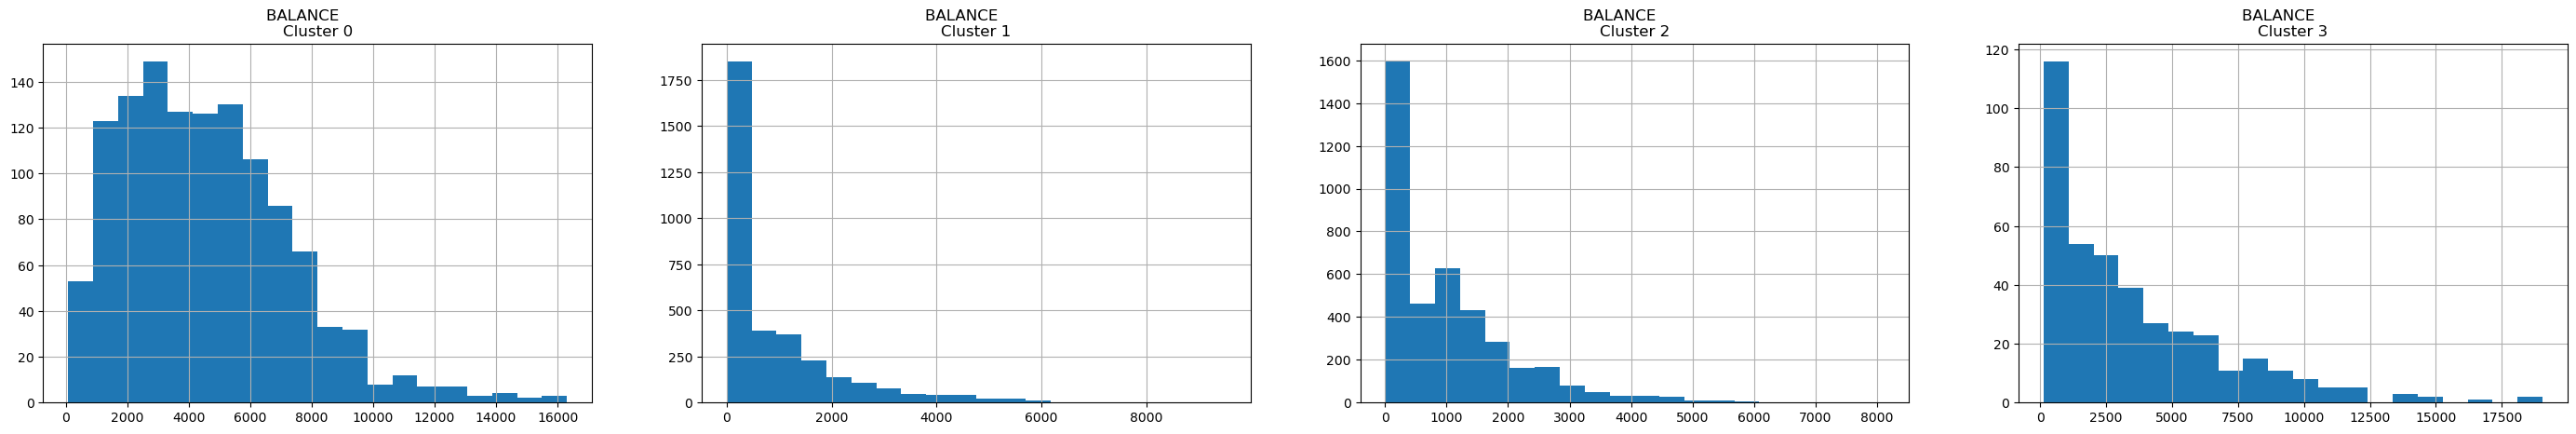

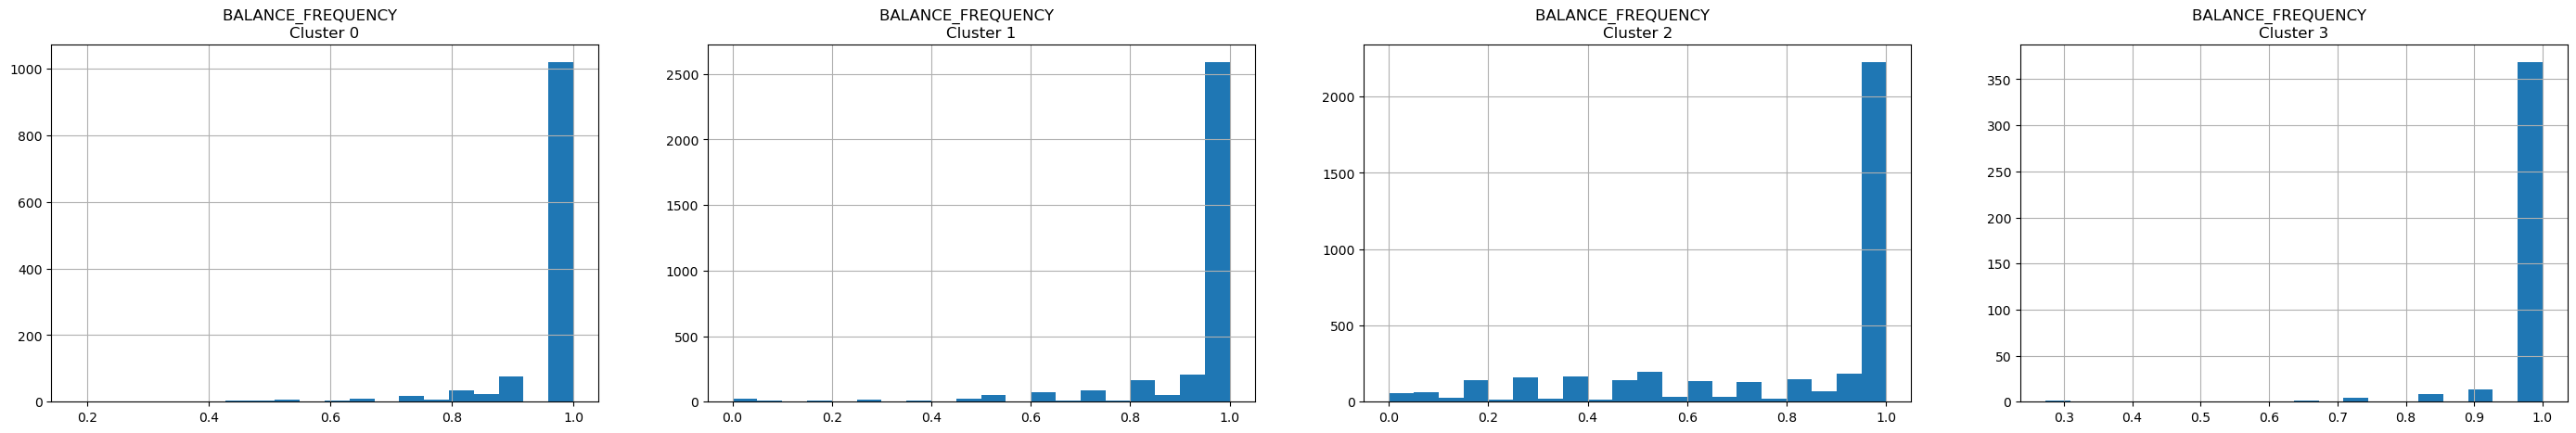

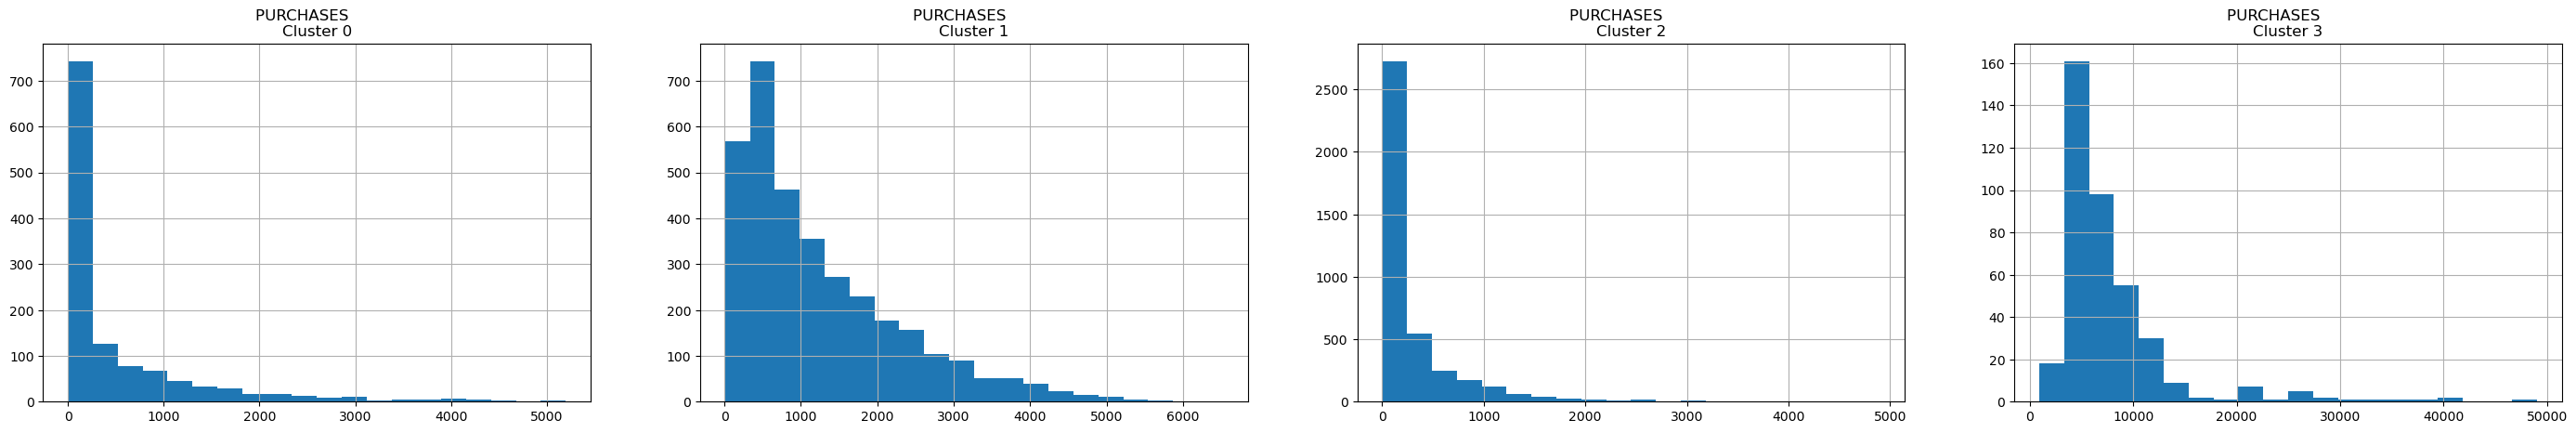

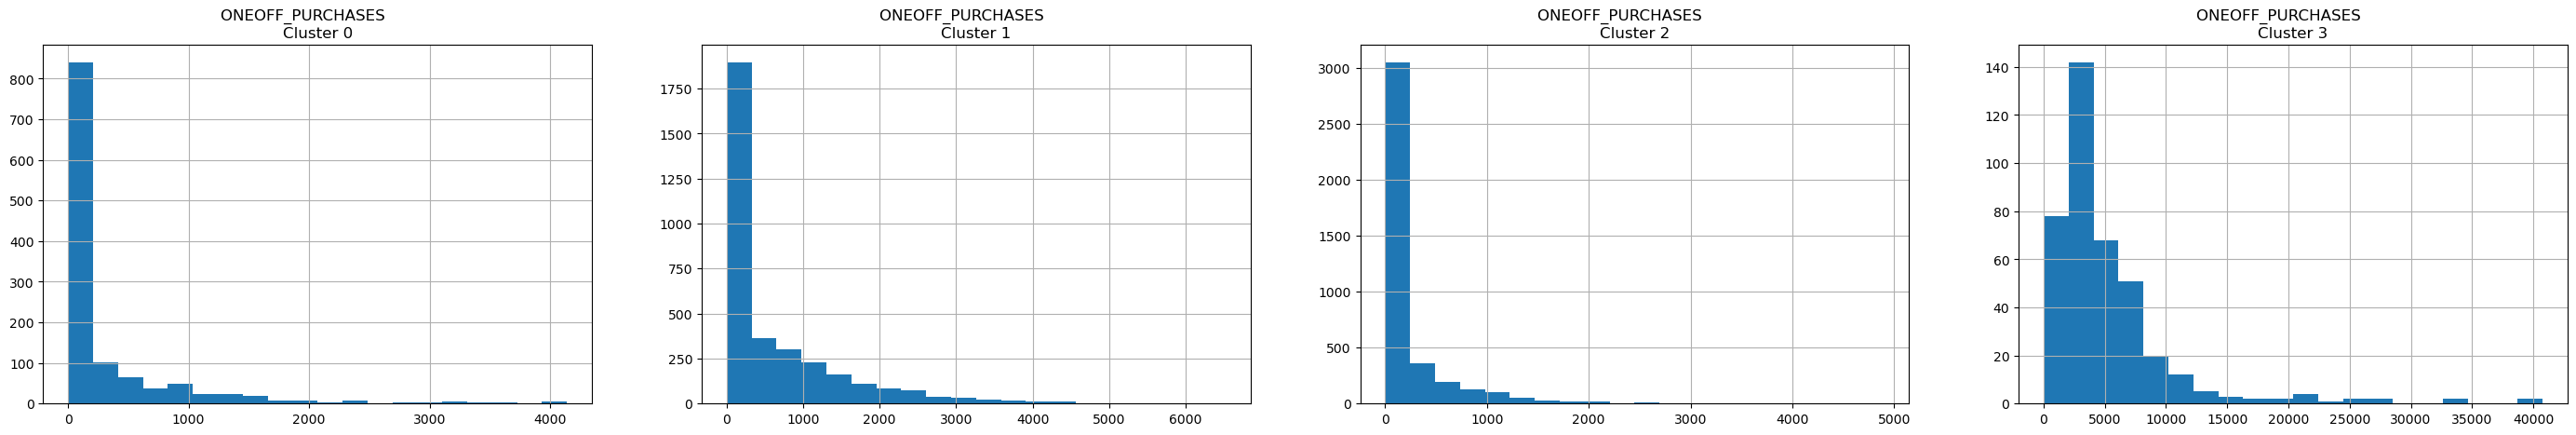

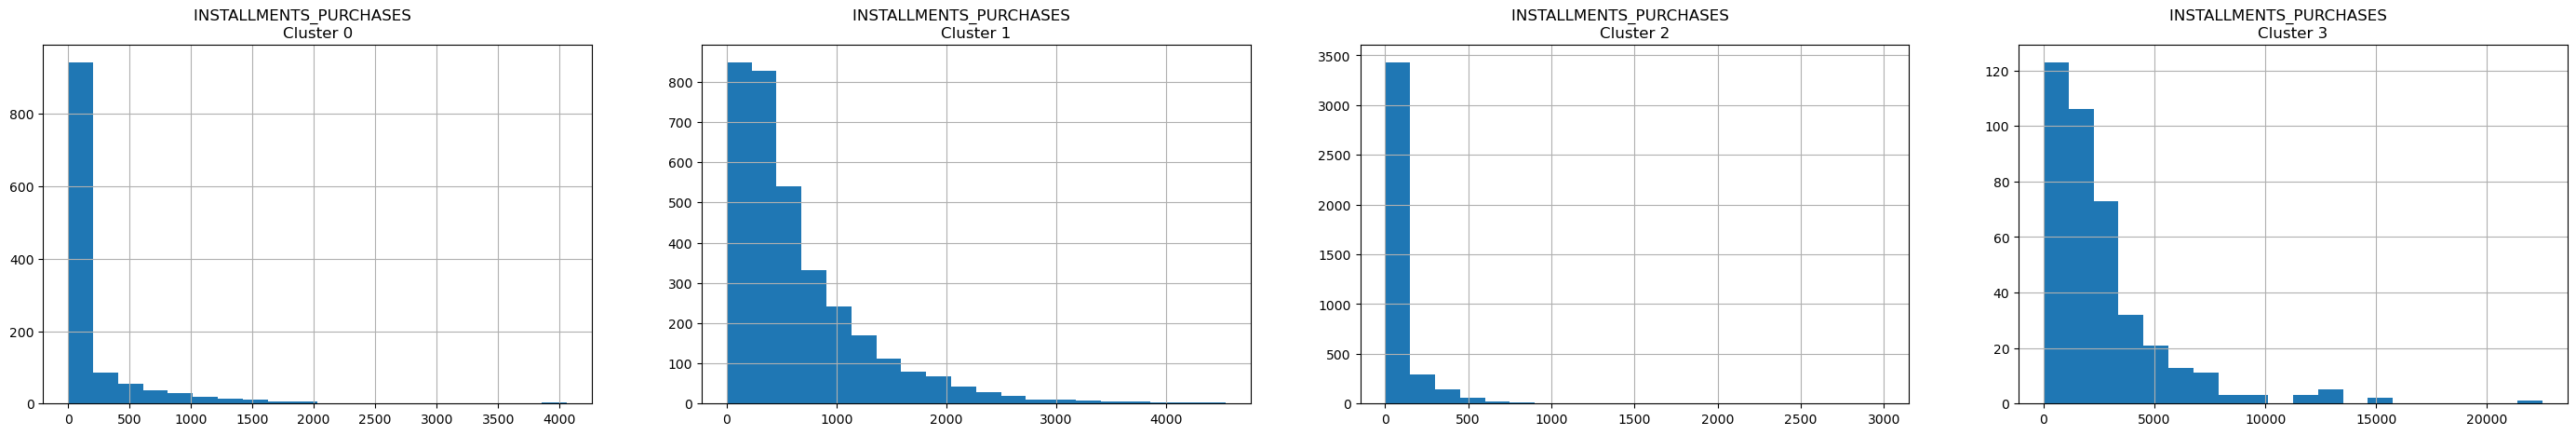

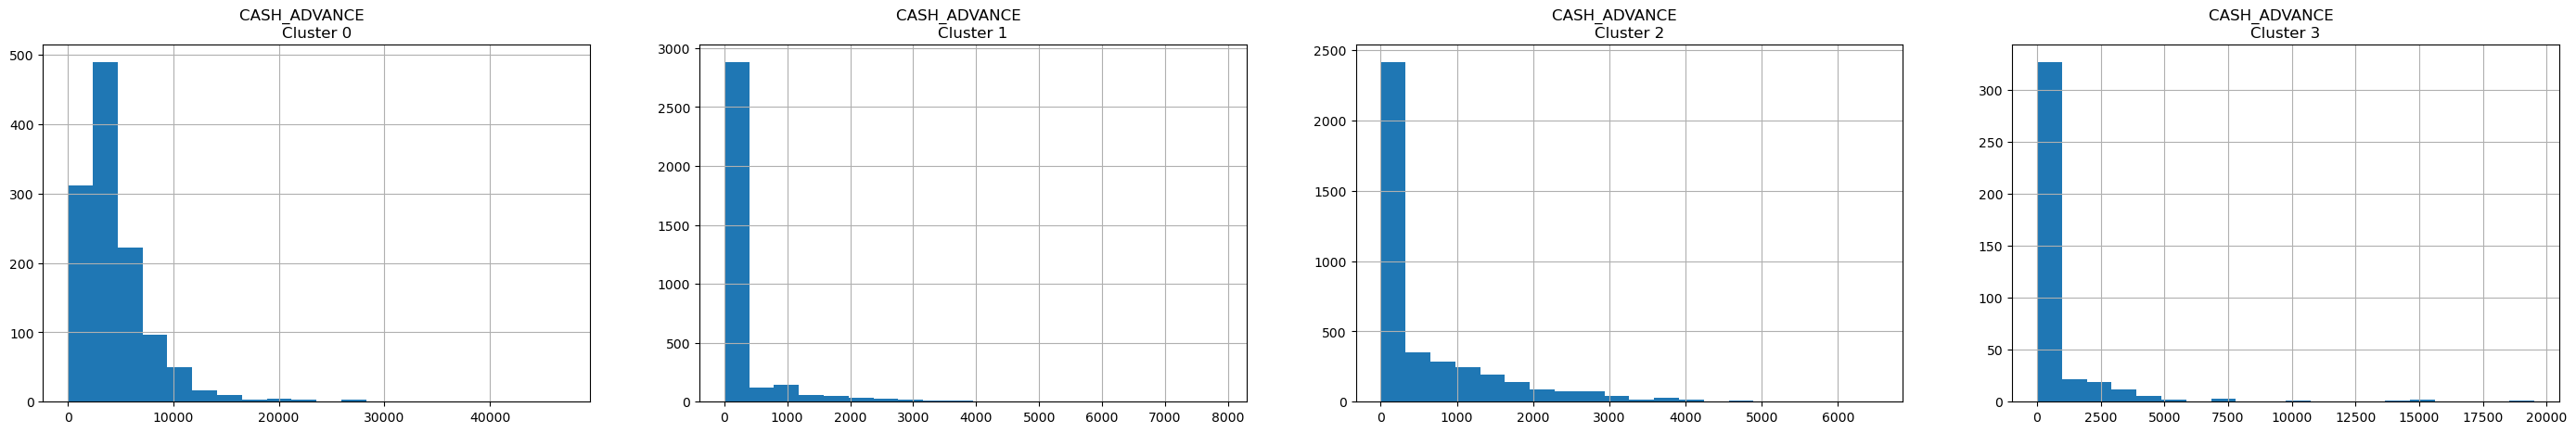

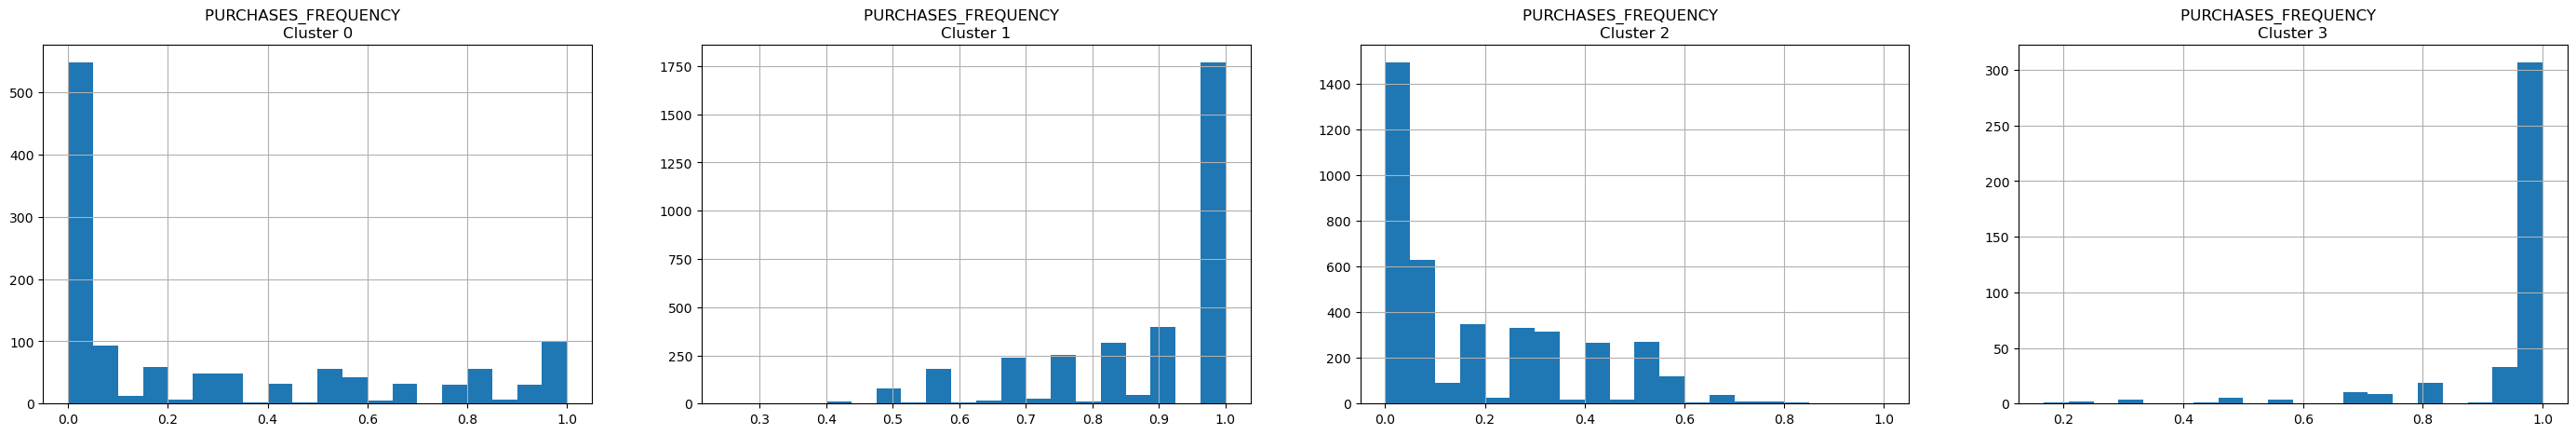

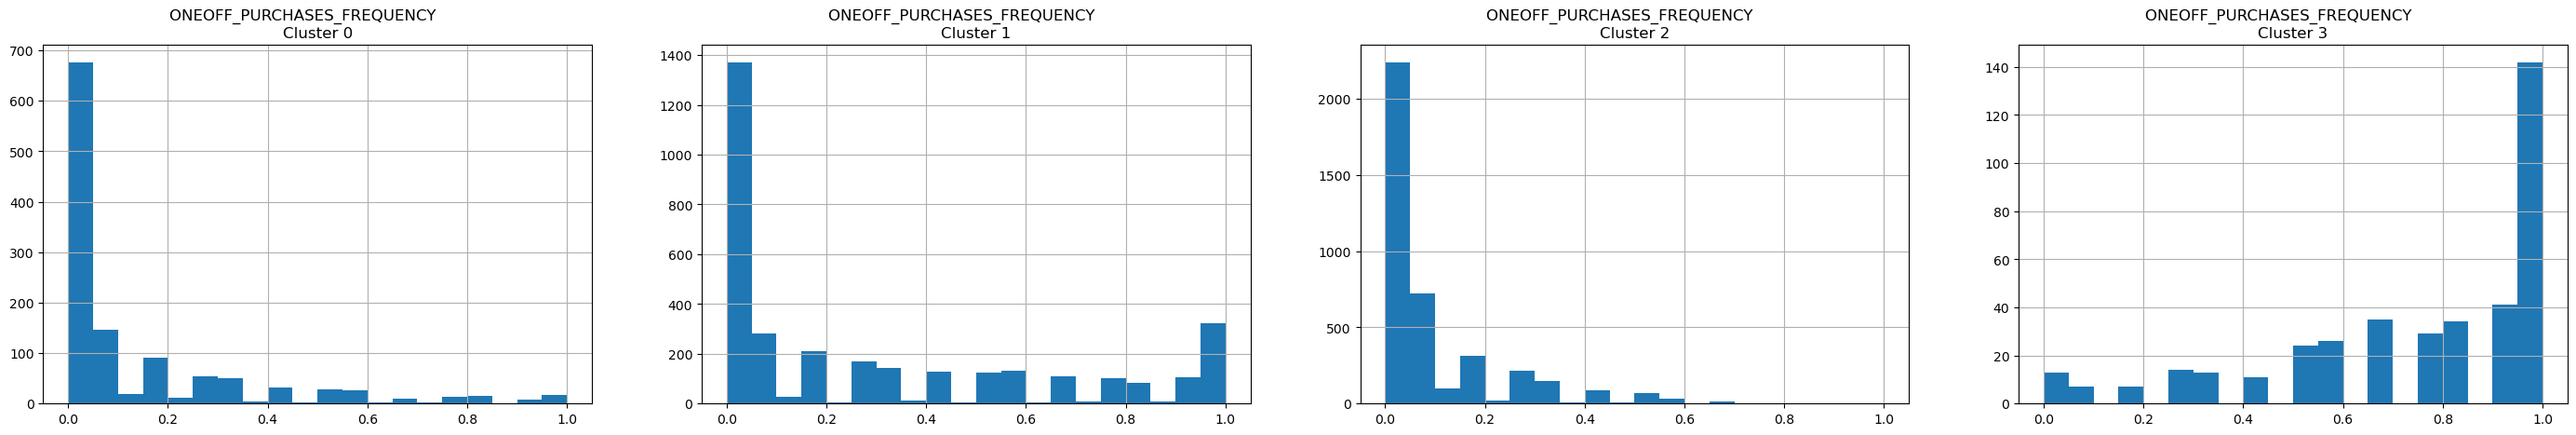

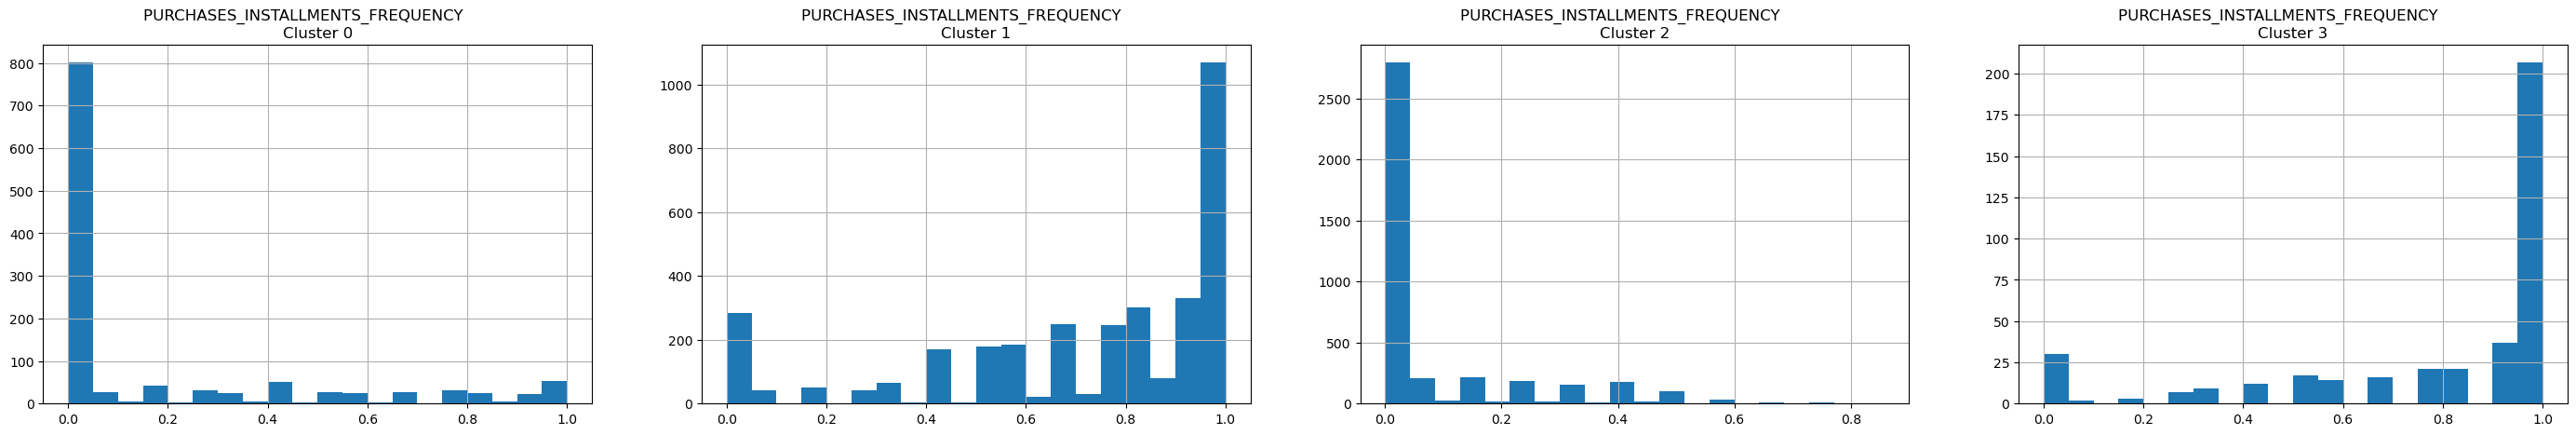

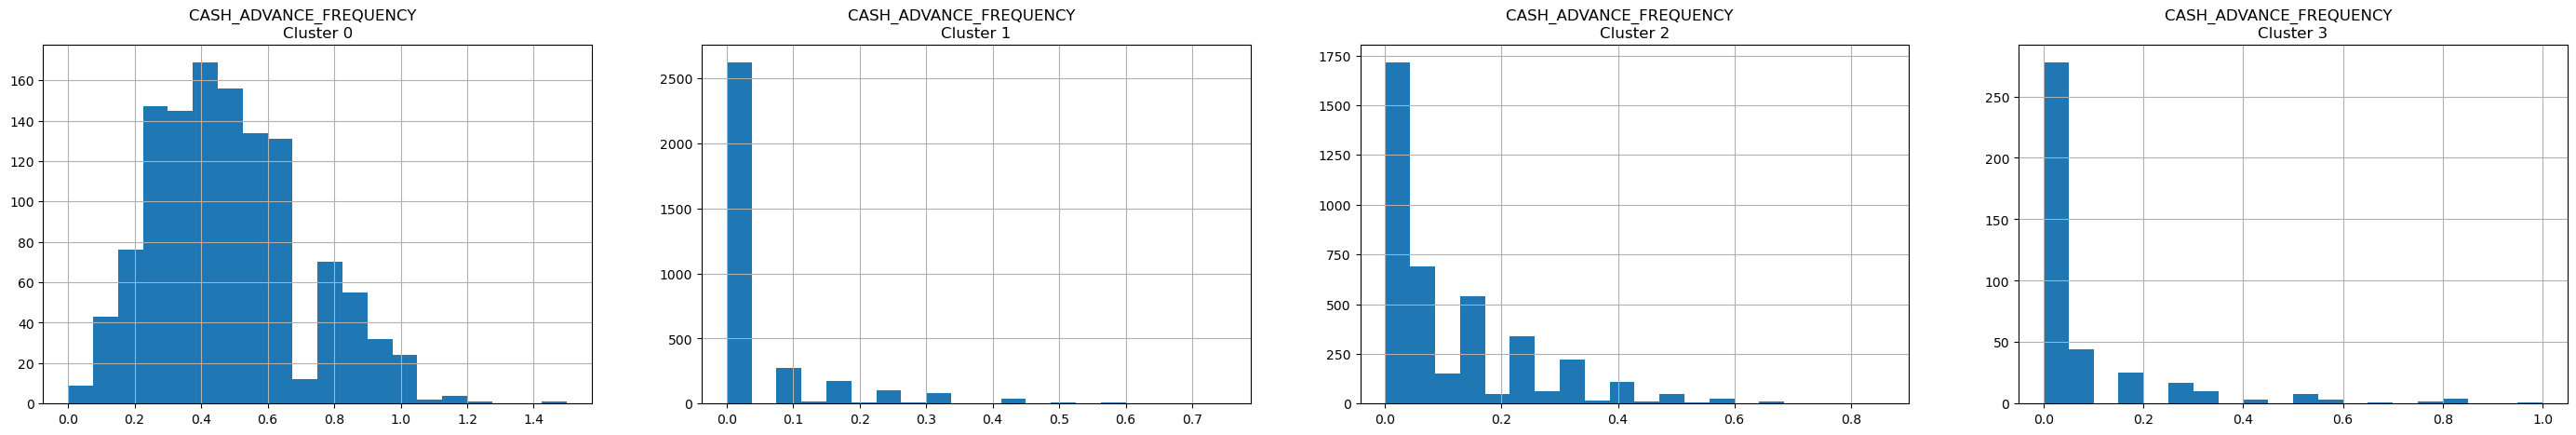

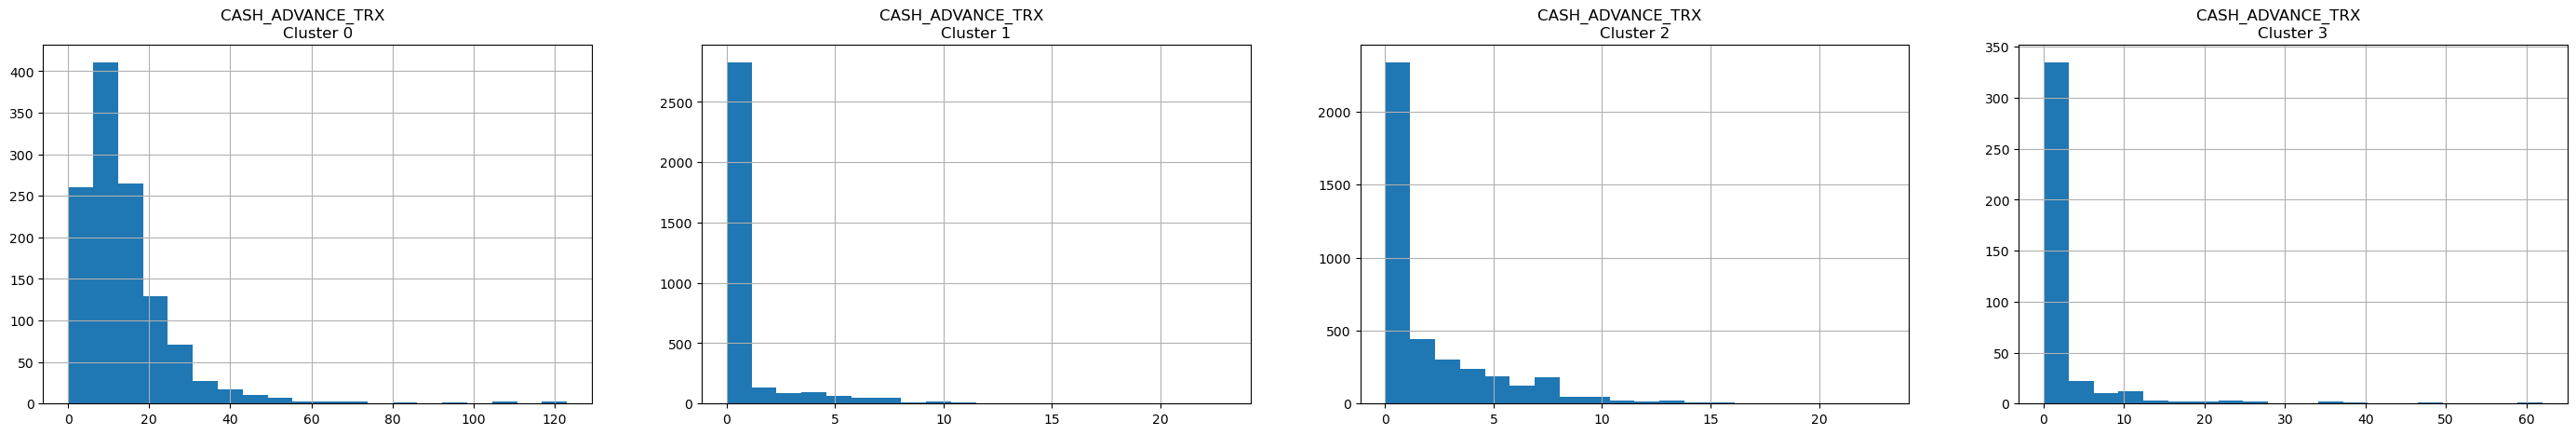

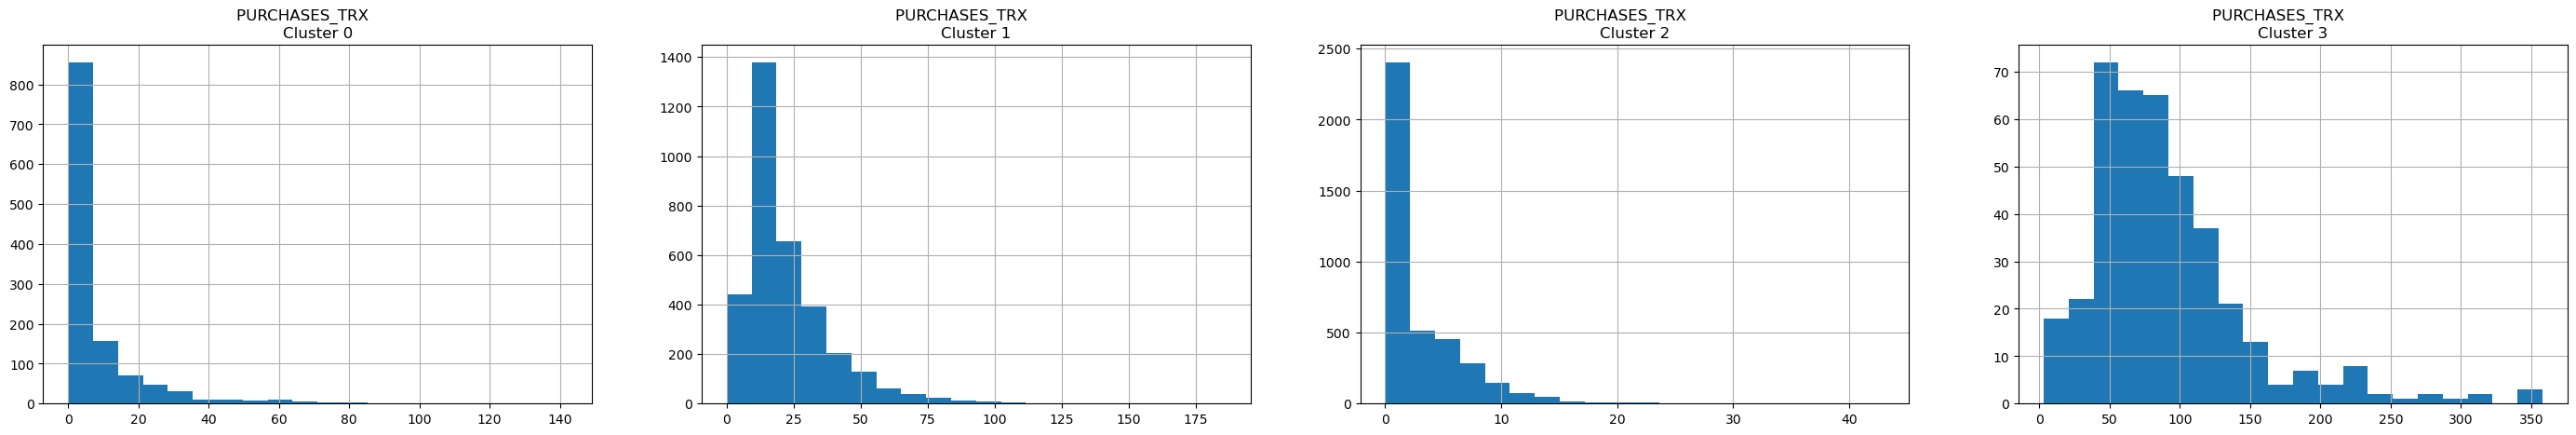

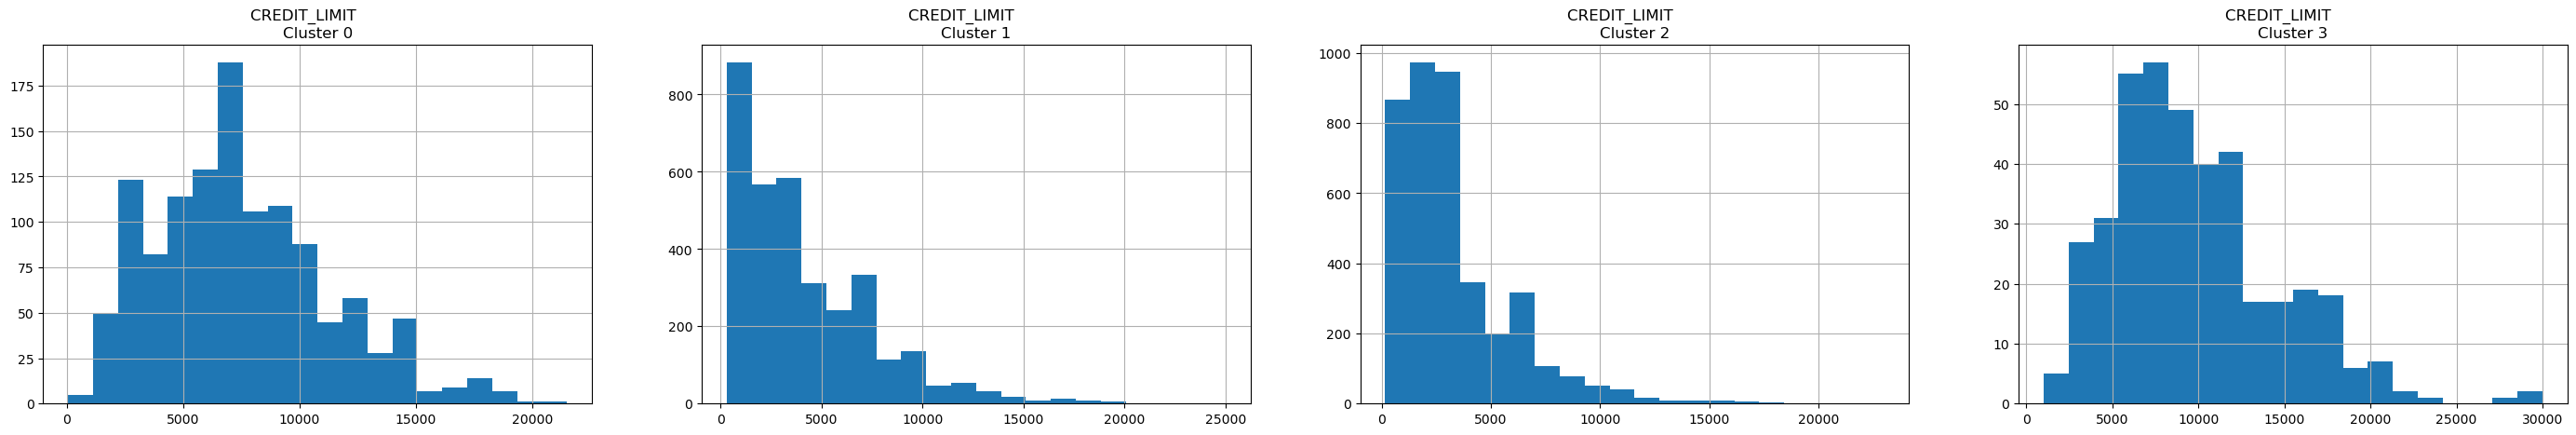

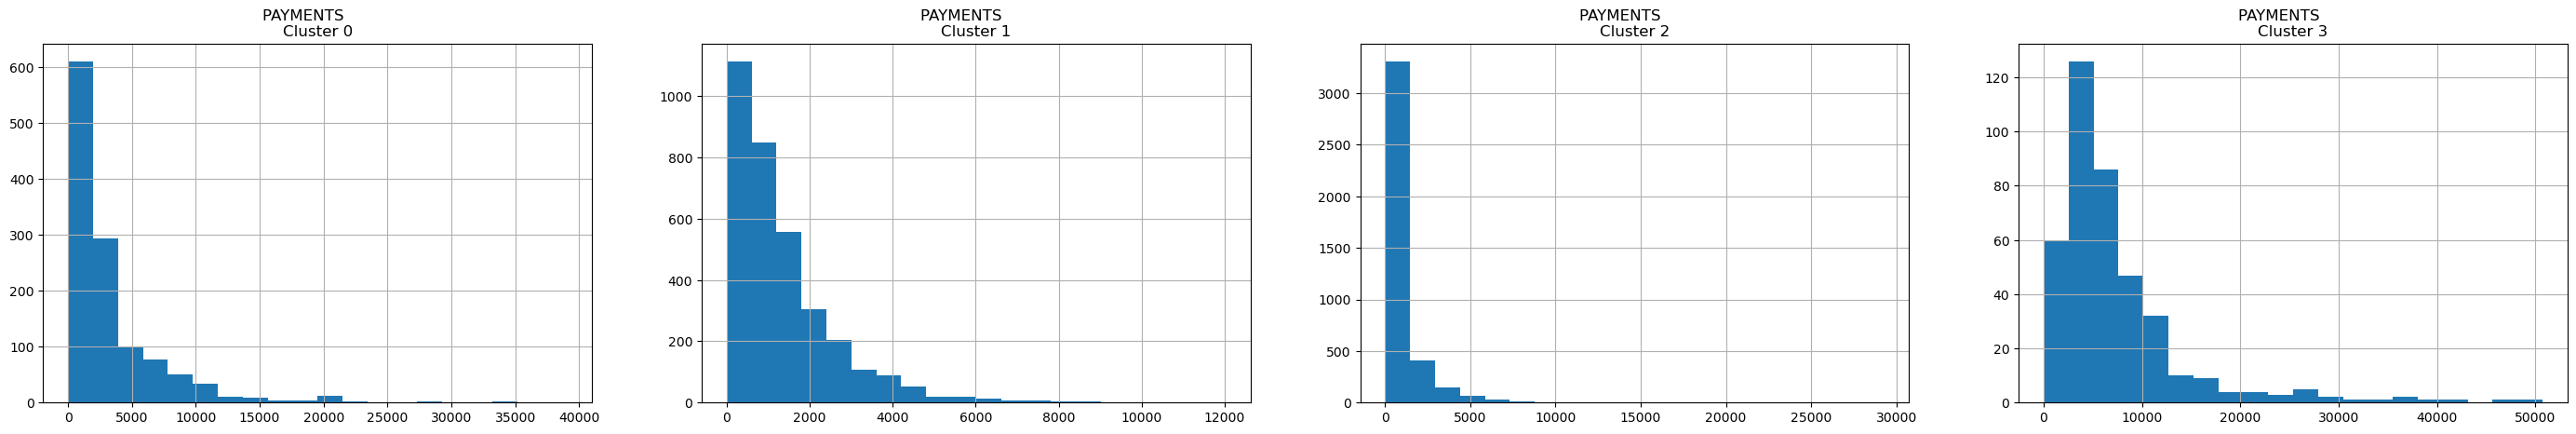

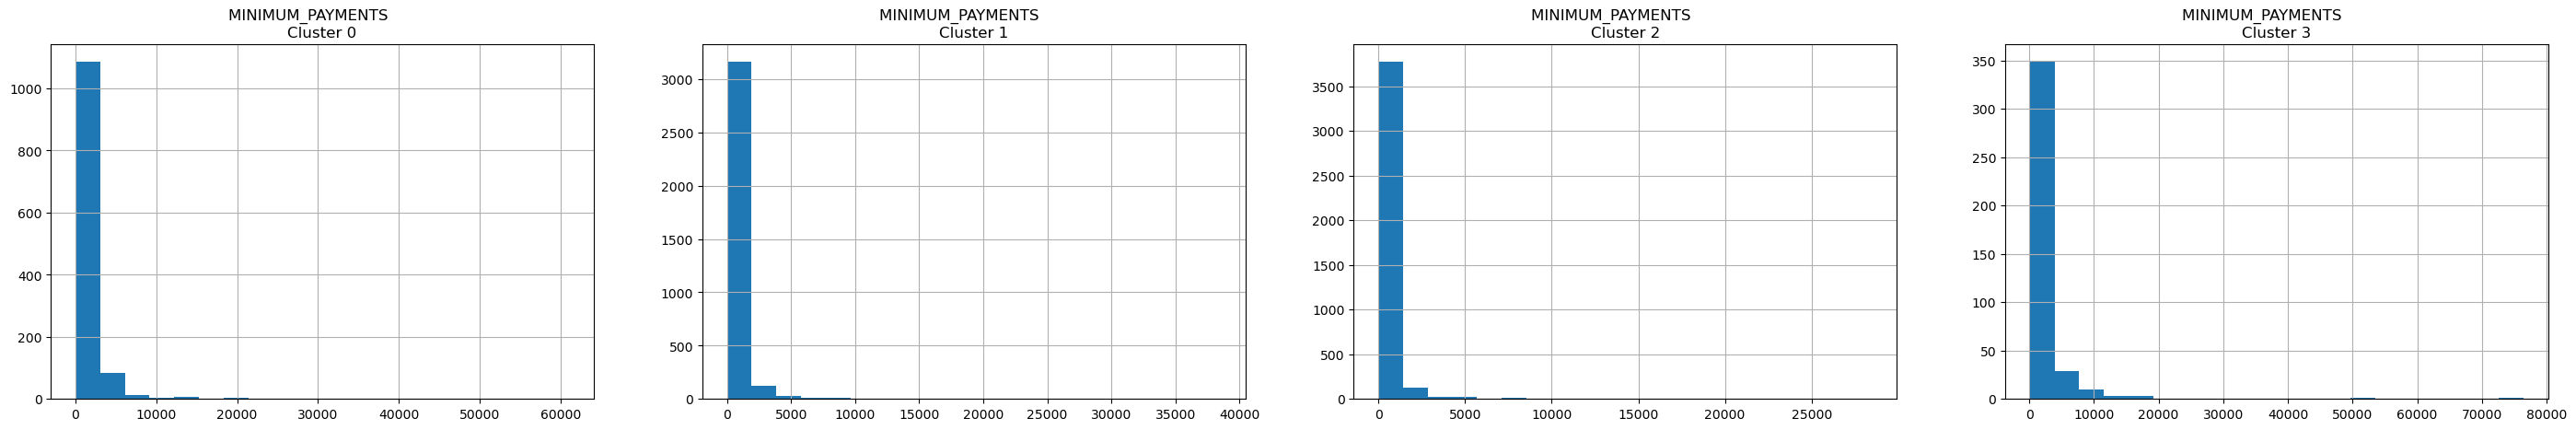

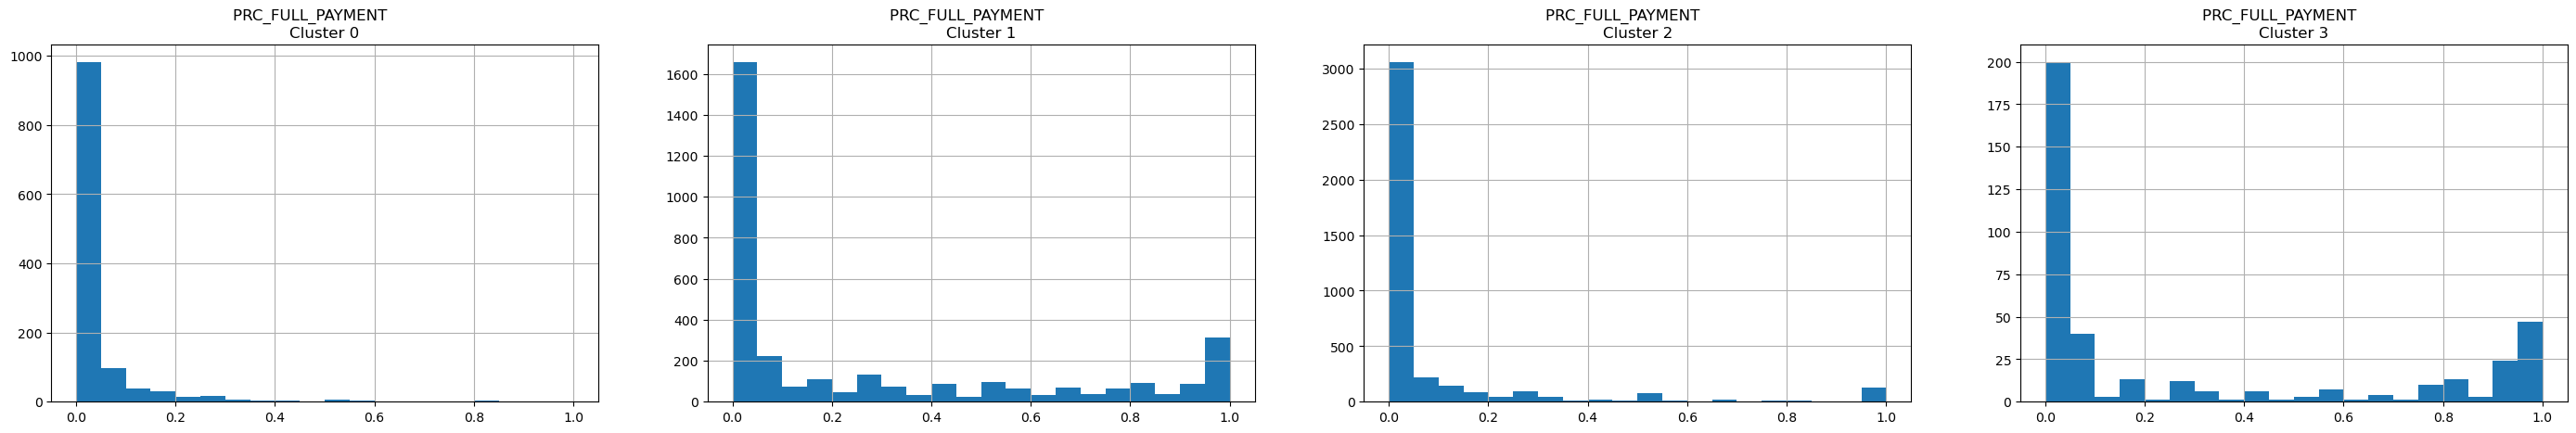

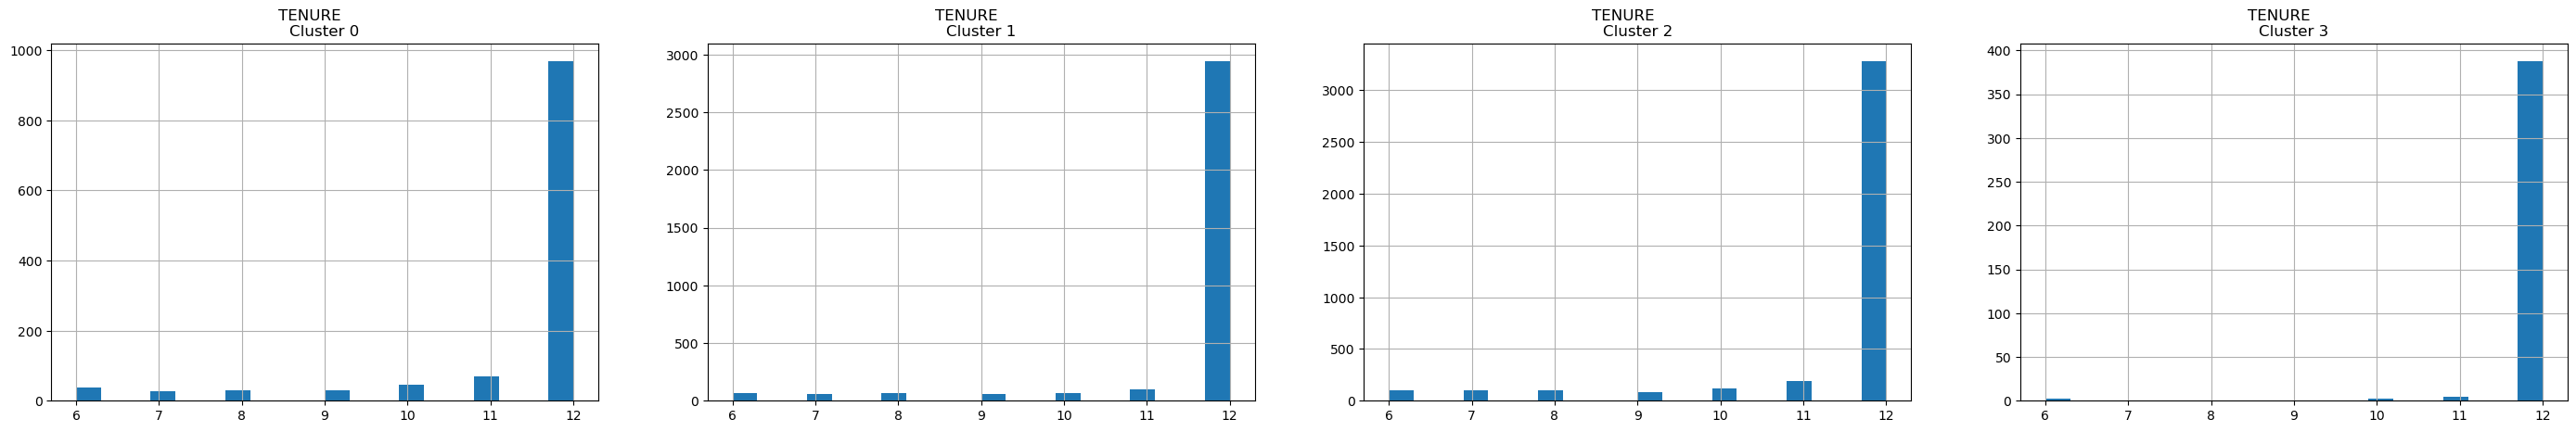

In [38]:
# 1.- Realizaremos un gráfico para cada cluster de cada variable, es decir, 8 gráficos para cada columna.
# 2.- 
for i in df.columns:
    plt.figure(figsize = (35,5)) # grafico
    for j in range(4): # 4 gráficos para cada una de las columnas del bucle anterior
        plt.subplot(1,4,j+1) # dibujar en 1 fila, 8 columnas, donde el actual sea j+1
        cluster = df_cluster[df_cluster['CLUSTER'] == j] # me quedo con los clientes marcados en el cluster j-ésimo
        cluster[i].hist(bins = 20) # dibujamos un histograma para la columna i-ésima, con el número total de divisiones sea de 20, para compararlos graficamente entre sí
        plt.title('{}      \nCluster {}'.format(i,j)) # título para cada gráfico
    plt.show()

### 6.6.3 Definición de los grupos de clientes.

#### CLUSTER 0. NOMBRE DEL GRUPO: CLIENTES DE ALTO VOLUMEN DE AVANCES Y PROPENSOS AL NO PAGO (1198 clientes)
##### 1.- Cuentan con el saldo más alto, siendo este 4600 dolares promedio, con una concentración de 1000 a 10000 dolares y actualizado casi siempre.
##### 2.- Tienen en promedio 500 compras realizadas en su cuenta, aunque la mayoría compra muy poco. Su compra máxima no sobrepasa los 3000, con un promedio de 320 dolares.
##### 3.- Casi no usan la tarjeta de crédito, en promedio realizan 180 compras a plazo.
##### 4.- Es el grupo que pide más cantidad de dinero en avances en efectivo, en promedio 4500 dolares, con un rango de 0 a 10k dolares.
##### 5.- Son compradores poco frecuentes. La frecuencia de compra "one punch" es de un 14%. Nunca usan crédito para comprar. En promedio, piden avances de efectivo con una frecuencia del 50%.
##### 6.- Son los que realizan más transacciones con efectivo por adelantado (14). Cantidad total promedio de transacciones 7, que se mueven entre 0 y 30, con un tope de 60.
##### 7.- Límite tarjeta: 7550 dolares, tope máximo del grupo: 20k.
##### 8.- Realizan casi 3.5k pagos. Son los que realizan más pagos mínimos junto al grupo del saldo más alto. Son los que tienen menor porcentaje del pago total.
##### 9.- Aproximadamente 950 personas llevan 12 años en la empresa, el resto se divide de forma equilibrada entre los 6 y 11 años.
    

#### CLUSTER 1. NOMBRE DEL GRUPO: CLIENTES POTENCIALES PROMEDIO (3366 clientes)
##### 1.- Cuentan con el saldo más bajo, siendo este de 900 dolares promedio, más de la mitad de ellos en torno a cero, concentrado de 0 a 3000 dolares y actualizado casi siempre.
##### 2.- A pesar de ser los de menor saldo, compran dos veces más que el grupo de saldo más alto, con un rango de 0 a 5000 ventas. Son capaces de gastar entre 1000 y 2000 dolares de una vez, con un promedio de 600 dolares.
##### 3.- En promedio realizan 640 compras a plazo, pero casi la mitad de ellos realiza entre 600 y 2500 compras.
##### 4.- Es el grupo que pide menos cantidad de dinero en avances en efectivo, en promedio 210 dolares.
##### 5.- Son compradores frecuentes, un 30% de las veces compran de una vez. La mitad de ellos siempre usa crédito para comprar, los demás no siempre. Casi nunca piden anticipo de efectivo.
##### 6.- Casi no realizan transacciones con efectivo por adelantado. Cantidad total promedio de transacciones 22, que se mueven entre 0 y 37, con un tope de 110.
##### 7.- Límite tarjeta: 4200 dolares, tope máximo del grupo: 20k.
##### 8.- Realizan pocos pagos y pagos mínimos. Tienen un buen porcentaje de pago total. 
##### 9.- Casi 3000 personas llevan 12 años en la empresa (90%), el resto se divide de forma equilibrada entre los 6 y 11 años.


#### CLUSTER 2. NOMBRE DEL GRUPO: CLIENTES POTENCIALES DE ALTO VOLUMEN (409 clientes)
##### 1.- Cuentan con un saldo alto, en torno a los 3500 dolares, con una concentración de 0 a 10000 dolares y siempre actualizado.
##### 2.- Son los que más realizan compras (7600), sin embargo algunos sobrepasan las 20k, 30k, incluso las 40k ventas. Son los más capaces para realizar compras grandes de una sola vez, pueden gastar entre 1000 y 10000 dolares e incluso 15k, 25k o 40k, con un promedio de 5100 dolares.
##### 3.- En promedio, son los que más realizan compras a plazo (2600), pero existen clientes que realizan de 10k a 15k.
##### 4.- Casi nunca piden avances en efectivo. Piden sumas medias avance cuando lo hacen, en promedio 650 dolares. 
##### 5.- Son los compradores más frecuentes, con un 74%. Casi siempre usan crédito para comprar.
##### 6.- Casi no realizan transacciones con efectivo por adelantado. Cantidad total promedio de transacciones 89 (los reyes), que se mueven entre 0 y 150, con un tope de 350.
##### 7.- Tienen el límite de tarjeta más alto: 9700 dolares y un tope máximo de grupo de 30K (el más alto también).
##### 8.- Realizan más de 7k pagos. Son los que realizan más pagos mínimos junto al grupo del saldo más alto. Son los que tienen mayor porcentaje del pago total.
##### 9.- Casi todos los clientes de este grupo llevan 12 años en la empresa.


#### CLUSTER 3. NOMBRE DEL GRUPO: CLIENTES INACTIVOS Y PROPENSOS AL NO PAGO (3977 clientes)
##### 1.- Cuentan con un saldo bajo de 1000 dolares promedio, con una concentración de 0 a 3000 dolares y con la tasa más baja de los 4 grupos en actualizar su saldo.
##### 2.- Son los que menos compras tienen asociadas a su cuenta (270 compras), al menos 2550 de ellos casi no compran y el rango de venta es de 0 a 1400. Son los clientes que no realizan grandes compras de una vez (210 dolares).
##### 3.- Casi no usan la tarjeta.
##### 4.- Piden sumas medias de dinero como avance, en promedio 600 dolares.
##### 5.- Son los compradores menos frecuentes, la mitad de ellos casi no compra, la frecuencia de "one punch" es de un 9%. Nunca usan crédito para comprar. Piden muy poco anticipo de efectivo.
##### 6.- Casi no realizan transacciones con efectivo por adelantado. Cantidad total promedio de transacciones 3, que se mueven entre 0 y 8, con un tope de 15.
##### 7.- Límite tarjeta: 3280 dolares, tope máximo del grupo: 17k.
##### 8.- Son los que realizan menos pagos y pagos mínimos. Además, tienen un bajísimo niveld de porcentaje del pago total.
##### 9.- Aproximadamente 3300 personas llevan 12 años en la empresa, el resto se divide de forma equilibrada entre los 6 y 11 años.


# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS 

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

## 7.1 Obtener las componentes principales.

In [39]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_scaled)
principal_components

array([[-1.68221911, -1.0764526 ],
       [-1.13829072,  2.50646907],
       [ 0.96967134, -0.38348869],
       ...,
       [-0.92620329, -1.81078663],
       [-2.33654845, -0.65797495],
       [-0.55642616, -0.40045941]])

## 7.2 Crear dataframe con las componentes principales.

In [40]:
pca_df = pd.DataFrame(data = principal_components, columns = ['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.682219,-1.076453
1,-1.138291,2.506469
2,0.969671,-0.383489
3,-0.873624,0.043158
4,-1.599434,-0.688580


## 7.3 Concatenar las componentes principales con las etiquetas de los clusters.

In [41]:
pca_df = pd.concat([pca_df, pd.DataFrame({'CLUSTER':labels})], axis = 1 )
pca_df.head()

,pca1,pca2,CLUSTER
0,-1.682219,-1.076453,2
1,-1.138291,2.506469,0
2,0.969671,-0.383489,1
3,-0.873624,0.043158,2
4,-1.599434,-0.688580,2


## 7.4 Visualización.

### 7.4.1 Primer método.

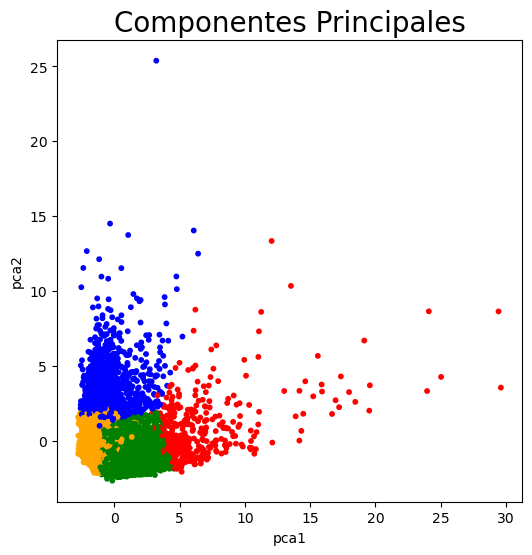

In [42]:
fig = plt.figure(figsize = (6,6)) #creamos una figura de 6x6

ax = fig.add_subplot(1,1,1) #indicamos que haremos solo un gráfico dentro de la figura
ax.set_xlabel('pca1', fontsize = 10) #nombres del eje x
ax.set_ylabel('pca2', fontsize = 10) #nombre del eje y
ax.set_title('Componentes Principales', fontsize = 20) #nombre del gráfico

color_theme = np.array(['blue', 'green', 'orange','red','yellow','brown','black','pink']) #creamos un array con ocho colores para cada cluster
ax.scatter(x = pca_df.pca1, y = pca_df.pca2,
          c = color_theme[pca_df.CLUSTER], s = 10)
#dibujar los puntos que representarán los vinos con scatter
#agregamos los valores de las columnas componentes
#usamos el parámetro c para indicarle los colores que deseamos para los puntos
# esta información se encuentra en KMeans_Clusters del objeto pca_nombres_vinos
# el tamaño de los puntos a graficar será de 50

plt.show()

### 7.4.2 Segundo método.

C:\Users\Danko\AppData\Local\Temp\ipykernel_12792\3305927613.py:3: UserWarning: The palette list has more values (8) than needed (4), which may not be intended.
  ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df, palette = ['blue', 'green', 'orange','red','yellow','brown','black','pink'], s = 10)


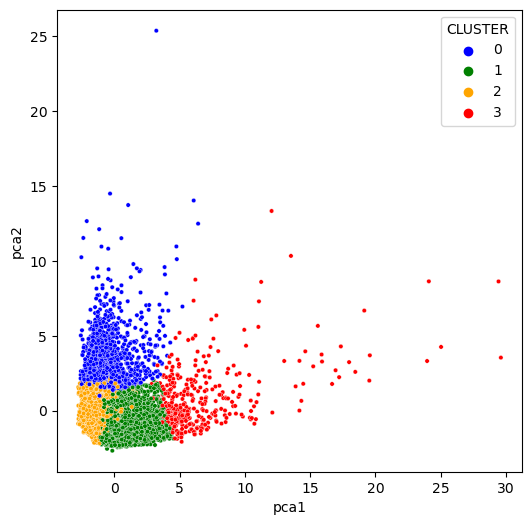

In [43]:
# Mucho más corto que el anterior y con puntos bordeados
plt.figure(figsize = (6, 6))
ax = sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'CLUSTER', data = pca_df, palette = ['blue', 'green', 'orange','red','yellow','brown','black','pink'], s = 10)
plt.show()